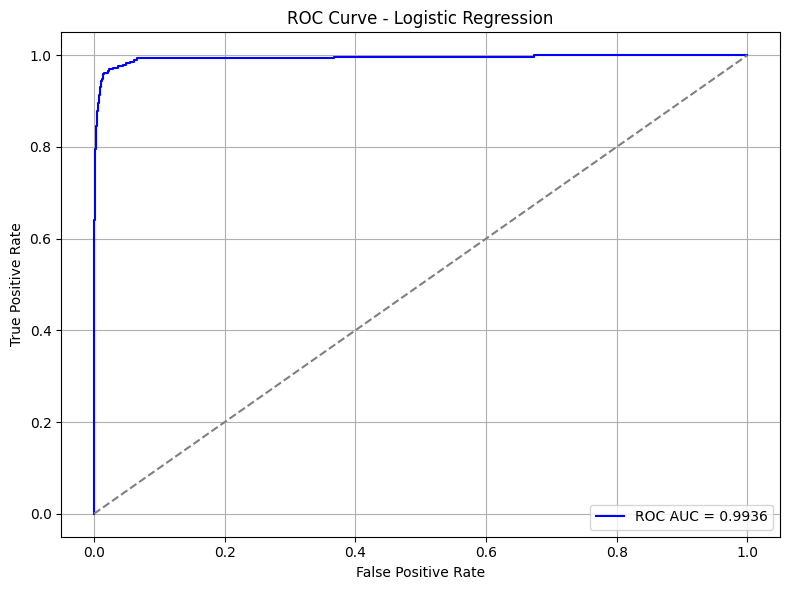

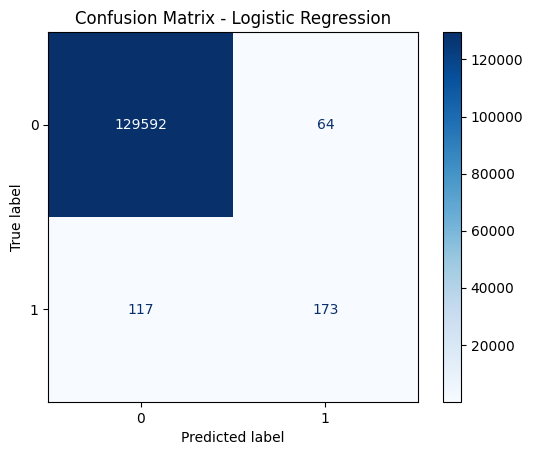

Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9995    0.9993    129656
           1     0.7300    0.5966    0.6565       290

    accuracy                         0.9986    129946
   macro avg     0.8645    0.7980    0.8279    129946
weighted avg     0.9985    0.9986    0.9985    129946

ROC AUC Score: 0.9936
AUPR Score: 0.6555

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/logisticRegression.csv


In [43]:
#LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/logisticRegression.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Define features and labels
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC AUC and AUPR
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

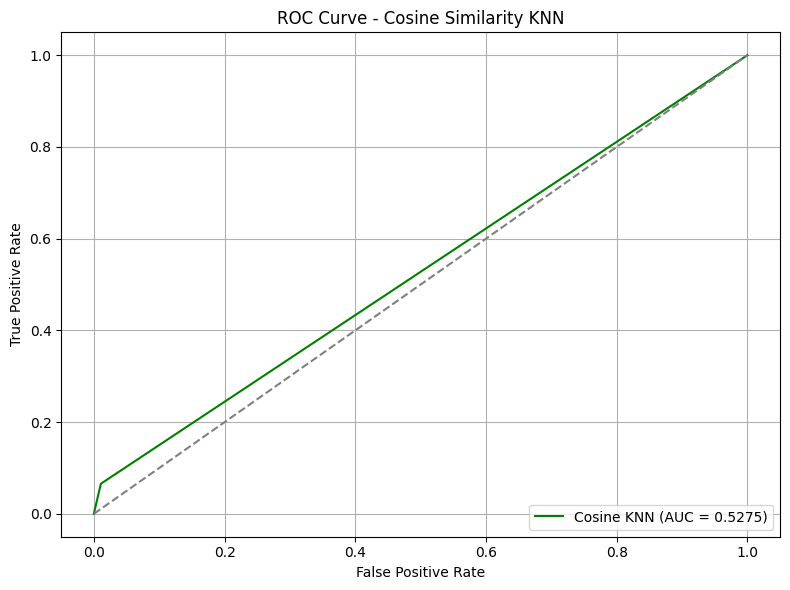

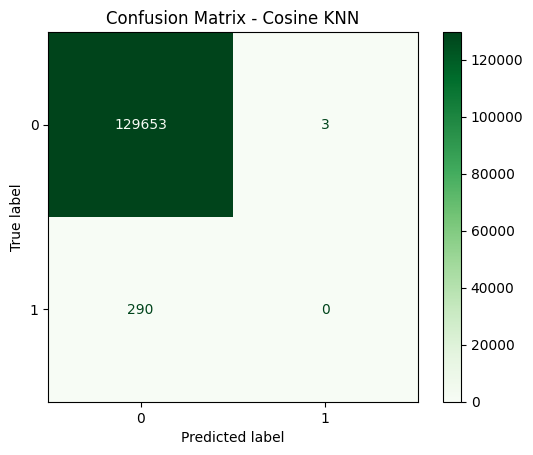

Classification Report:
               precision    recall  f1-score   support

           0     0.9978    1.0000    0.9989    129656
           1     0.0000    0.0000    0.0000       290

    accuracy                         0.9977    129946
   macro avg     0.4989    0.5000    0.4994    129946
weighted avg     0.9955    0.9977    0.9966    129946

ROC AUC Score: 0.5275
AUPR Score: 0.0030

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/KNeighborsClassifier.csv


In [71]:
# KNeighborsClassifier with AUPR Score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/KNeighborsClassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Calculate interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")

# Drop missing values
merged = merged.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=["lable"])
y = merged["lable"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN with cosine similarity
model = KNeighborsClassifier(n_neighbors=5, metric='cosine')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Probabilities
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
else:
    y_proba = [1 if pred == 1 else 0 for pred in y_pred]

# ROC Curve and Scores
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Cosine KNN (AUC = {roc_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cosine Similarity KNN")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Cosine KNN")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9990    0.9996    0.9993    129656
           1     0.7594    0.5552    0.6414       290

    accuracy                         0.9986    129946
   macro avg     0.8792    0.7774    0.8204    129946
weighted avg     0.9985    0.9986    0.9985    129946



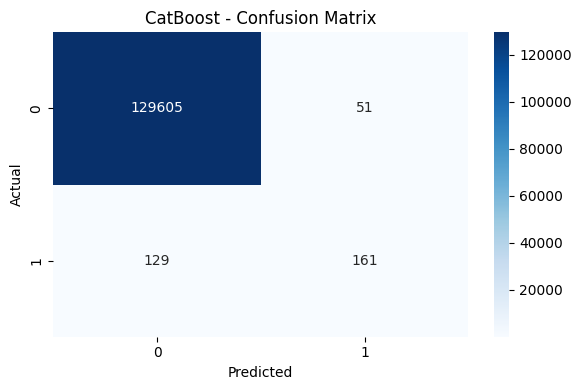

ROC AUC Score: 0.9915


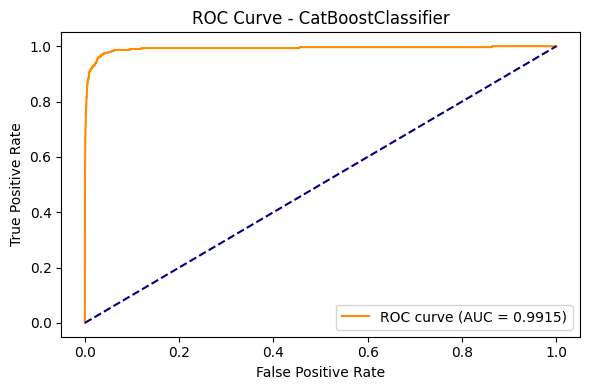

AUPR Score (Average Precision): 0.6714

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/catboost_predictions.csv


In [41]:
#CatBoostClassifier
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/catboost_predictions.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Create interaction feature (degree)
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical features
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle='--', color="navy")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoostClassifier')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# AUPR (Average Precision Score)
aupr_score = average_precision_score(y_test, y_pred_prob)
print(f"AUPR Score (Average Precision): {aupr_score:.4f}")

# Save predictions
results = X_test.copy()
results["actual"] = y_test.values
results["predicted"] = y_pred
results["predicted_proba"] = y_pred_prob
results["roc_auc"] = roc_auc
results["aupr"] = aupr_score
results.to_csv(output_path, index=False)

print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

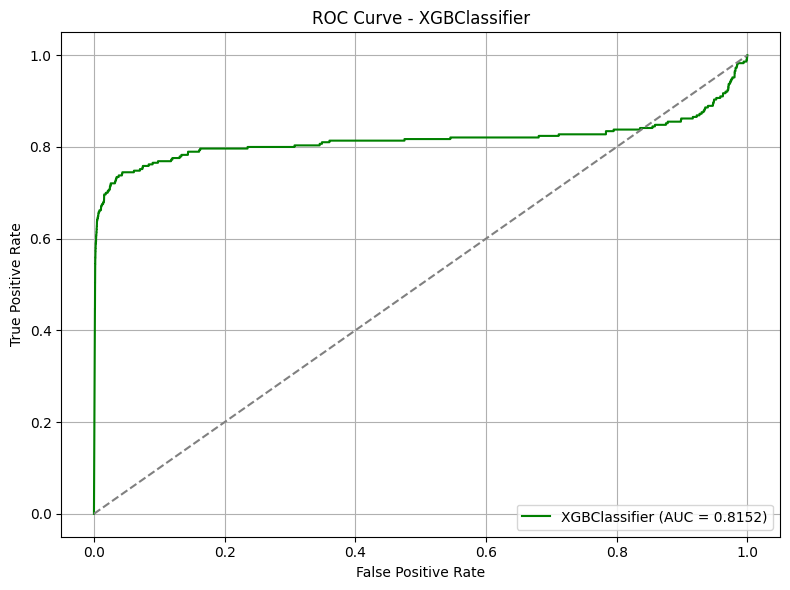

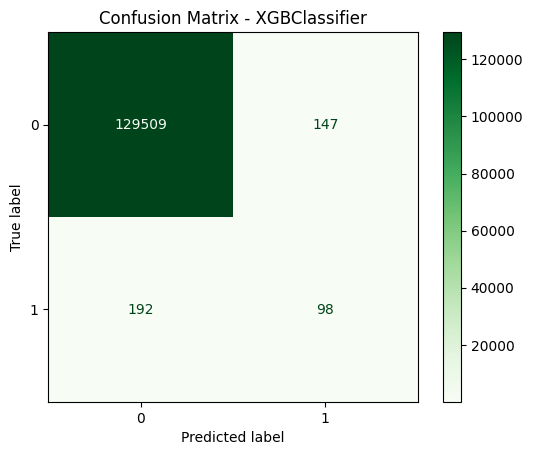

Classification Report:
               precision    recall  f1-score   support

           0     0.9985    0.9989    0.9987    129656
           1     0.4000    0.3379    0.3664       290

    accuracy                         0.9974    129946
   macro avg     0.6993    0.6684    0.6825    129946
weighted avg     0.9972    0.9974    0.9973    129946

ROC AUC Score: 0.8152
AUPR Score: 0.2613

Predictions, ROC AUC and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/XGBClassifier_predictions.csv


In [44]:
#XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/XGBClassifier_predictions.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Calculate interaction degree for each gene
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Define features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBClassifier model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBClassifier (AUC = {roc_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBClassifier")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save results to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)

print(f"\nPredictions, ROC AUC and AUPR saved to: {output_path}")

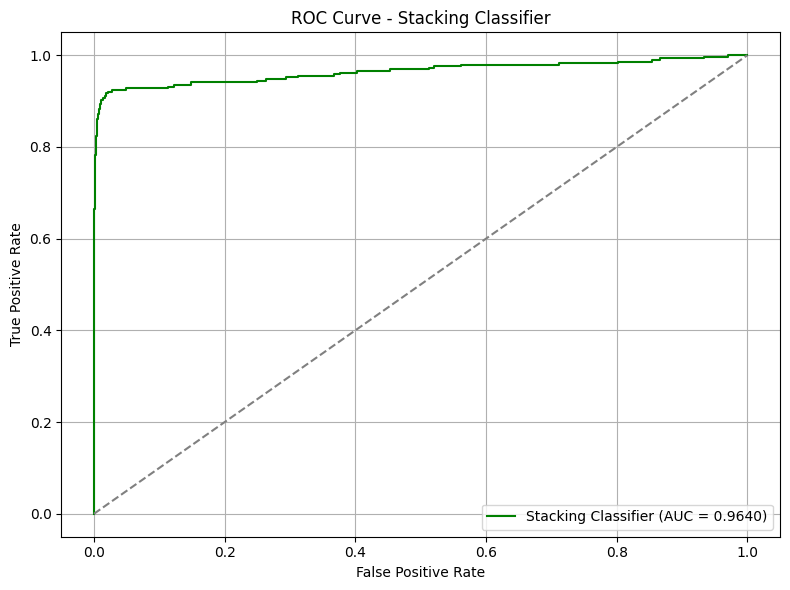

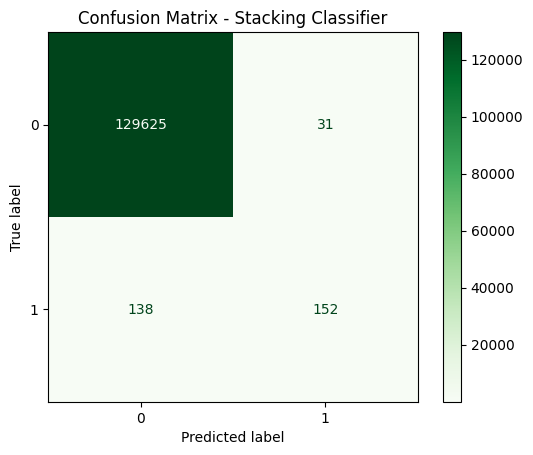

Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9998    0.9993    129656
           1     0.8306    0.5241    0.6427       290

    accuracy                         0.9987    129946
   macro avg     0.9148    0.7619    0.8210    129946
weighted avg     0.9986    0.9987    0.9986    129946

ROC AUC Score: 0.9640
AUPR Score: 0.6996

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/stacking_classifier_results.csv


In [45]:
#StackingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/stacking_classifier_results.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Calculate interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Define features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Final model
final_estimator = LogisticRegression(max_iter=1000)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)
y_proba = stacking_model.predict_proba(X_test)[:, 1]

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Stacking Classifier (AUC = {roc_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stacking Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR Score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

Training on 519780 samples with 6 features...


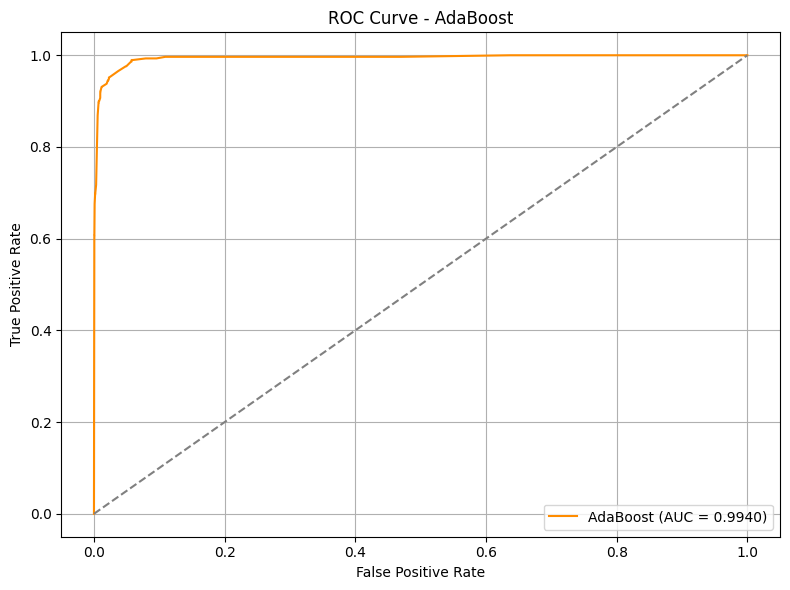

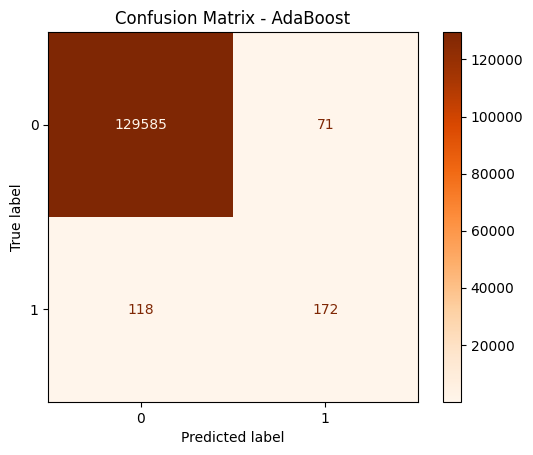

Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9995    0.9993    129656
           1     0.7078    0.5931    0.6454       290

    accuracy                         0.9985    129946
   macro avg     0.8535    0.7963    0.8223    129946
weighted avg     0.9984    0.9985    0.9985    129946

ROC AUC Score: 0.9940
AUPR Score: 0.5432

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/adaboostclassifier.csv


In [46]:
# AdaBoostClassifier with AUPR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/adaboostclassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Prepare interaction feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Define features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training on {len(X_train)} samples with {X_train.shape[1]} features...")

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# AUPR score
aupr_score = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr_score:.4f}")

# Save results to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

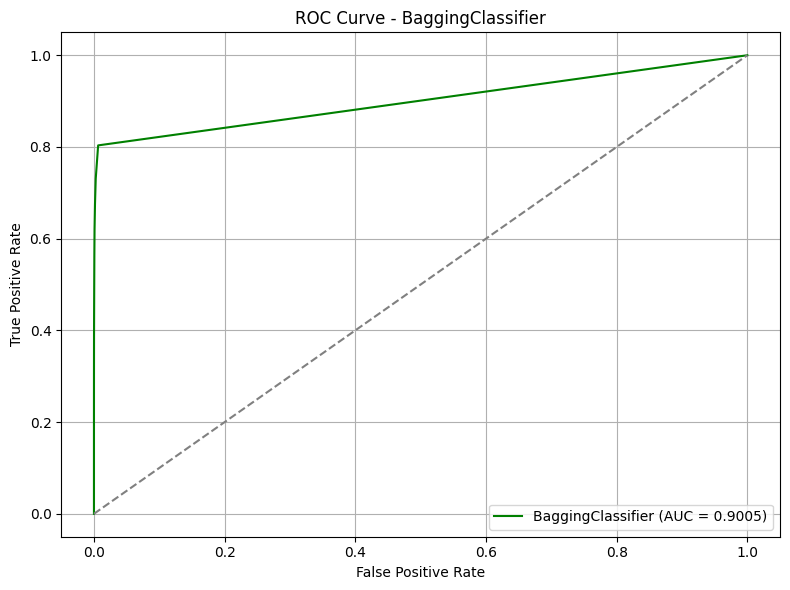

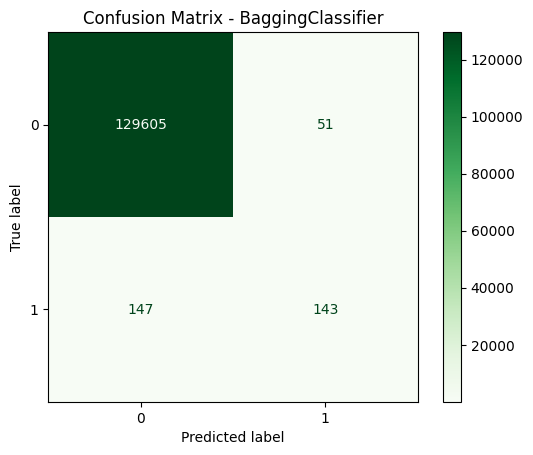

Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9996    0.9992    129656
           1     0.7371    0.4931    0.5909       290

    accuracy                         0.9985    129946
   macro avg     0.8680    0.7464    0.7951    129946
weighted avg     0.9983    0.9985    0.9983    129946

ROC AUC Score: 0.9005
AUPR Score: 0.5942

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/baggingclassifier.csv


In [47]:
# BaggingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/baggingclassifier.csv'

# Load and preprocess data
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Prepare features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train BaggingClassifier model
model = BaggingClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Probabilities for ROC AUC and AUPR
try:
    y_proba = model.predict_proba(X_test)[:, 1]
except AttributeError:
    y_proba = MinMaxScaler().fit_transform(y_pred.reshape(-1, 1)).ravel()

# Compute ROC AUC and AUPR
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr_score = average_precision_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'BaggingClassifier (AUC = {roc_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - BaggingClassifier")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - BaggingClassifier")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr_score:.4f}")

# Save results to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

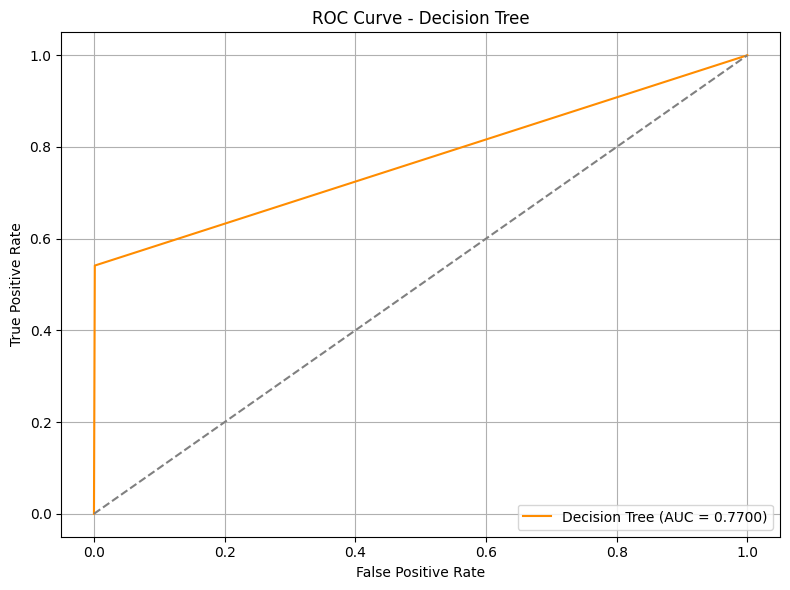

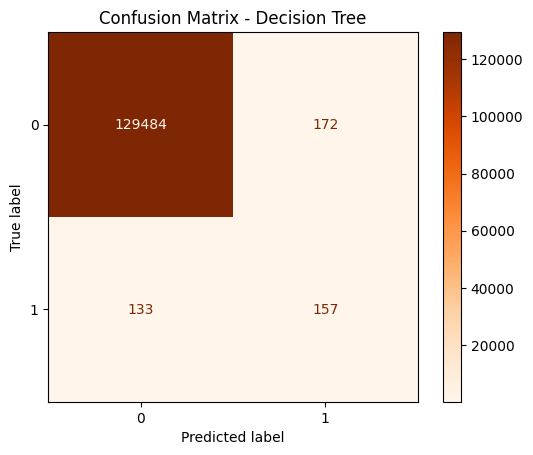

Classification Report:

              precision    recall  f1-score   support

           0     0.9990    0.9987    0.9988    129656
           1     0.4772    0.5414    0.5073       290

    accuracy                         0.9977    129946
   macro avg     0.7381    0.7700    0.7530    129946
weighted avg     0.9978    0.9977    0.9977    129946

ROC AUC Score: 0.7700
AUPR Score: 0.2594

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/DecisionTreeClassifier.csv


In [48]:
# DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/DecisionTreeClassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute gene interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")

# Drop missing values
merged = merged.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Feature matrix and target variable
X = merged.drop(columns=["lable"])
y = merged["lable"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# AUPR Score
aupr_score = average_precision_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.4f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr_score:.4f}")

# Save results to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)

print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

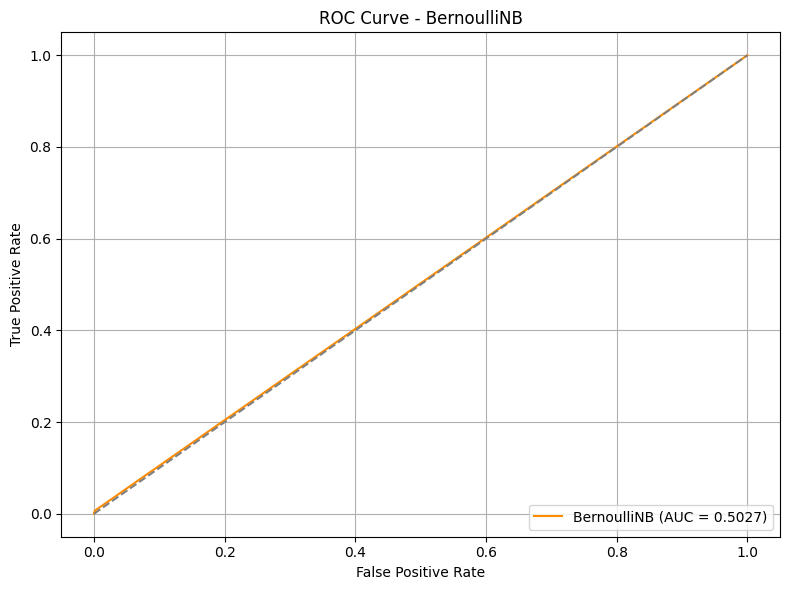

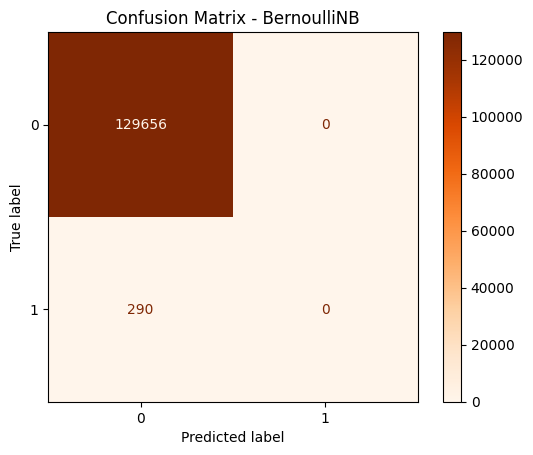

Classification Report:
               precision    recall  f1-score   support

           0     0.9978    1.0000    0.9989    129656
           1     0.0000    0.0000    0.0000       290

    accuracy                         0.9978    129946
   macro avg     0.4989    0.5000    0.4994    129946
weighted avg     0.9955    0.9978    0.9967    129946

ROC AUC Score: 0.5027
AUPR Score: 0.0023

Predictions, ROC AUC, and AUPR saved to: /Users/gunthaaishwarya/Desktop/datasets/BernoulliNB.csv


In [49]:
#BernoulliNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/BernoulliNB.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Calculate interaction degree for each gene
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Prepare features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train BernoulliNB model
model = BernoulliNB()
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr_score = average_precision_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'BernoulliNB (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - BernoulliNB")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - BernoulliNB")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr_score:.4f}")

# Save results to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)

print(f"\nPredictions, ROC AUC, and AUPR saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9990    0.9997    0.9993    129656
           1     0.7864    0.5586    0.6532       290

    accuracy                         0.9987    129946
   macro avg     0.8927    0.7791    0.8263    129946
weighted avg     0.9985    0.9987    0.9986    129946



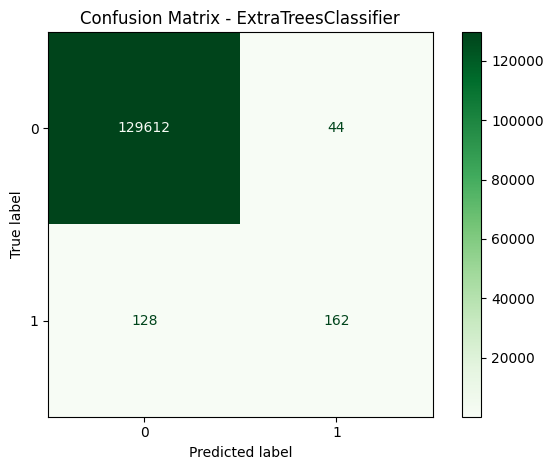

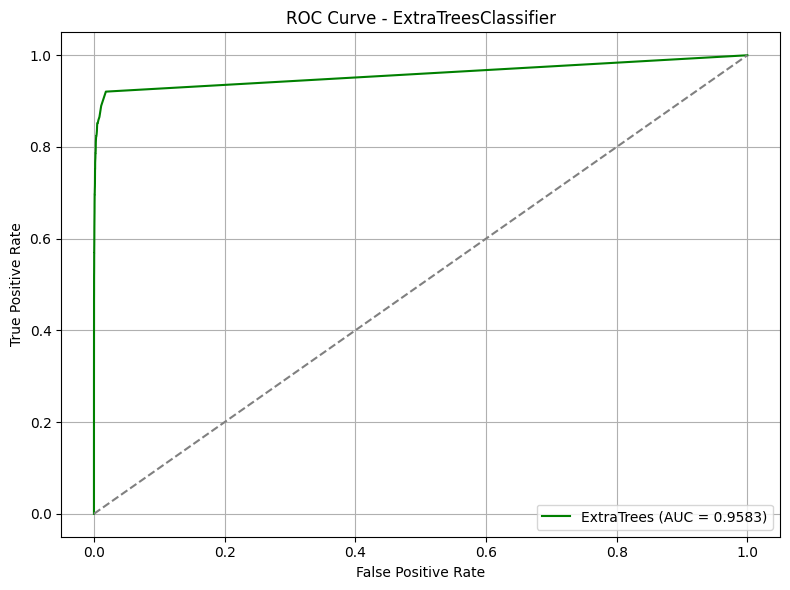

ROC AUC Score: 0.9583
AUPR Score: 0.6908

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/ExtraTreesClassifier.csv


In [50]:
# ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/ExtraTreesClassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Create interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical columns
for col in merged.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    merged[col] = le.fit_transform(merged[col])

# Define features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Greens")
plt.title("Confusion Matrix - ExtraTreesClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ExtraTrees (AUC = {roc_auc:.4f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ExtraTreesClassifier")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR Score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save results
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9890    0.9943    129656
           1     0.1473    0.8517    0.2511       290

    accuracy                         0.9887    129946
   macro avg     0.5735    0.9203    0.6227    129946
weighted avg     0.9978    0.9887    0.9926    129946



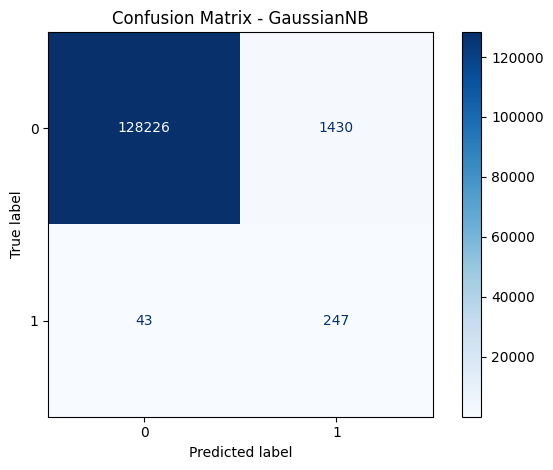

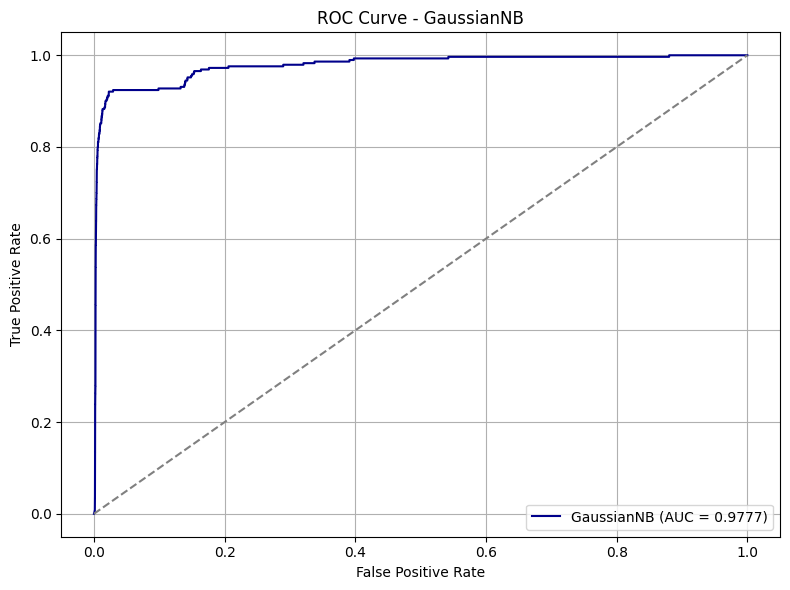

ROC AUC Score: 0.9777
AUPR Score: 0.2060

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/GaussianNB.csv


In [51]:
# GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/GaussianNB.csv'

# Load data
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Generate interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical columns
for col in merged.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    merged[col] = le.fit_transform(merged[col])

# Split features and labels
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - GaussianNB")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"GaussianNB (AUC = {roc_auc:.4f})", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GaussianNB")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR Score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save predictions and probabilities
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Training on 519780 samples with 6 features...
Classification Report:

              precision    recall  f1-score   support

           0     0.9981    0.9992    0.9986    129656
           1     0.2953    0.1517    0.2005       290

    accuracy                         0.9973    129946
   macro avg     0.6467    0.5755    0.5996    129946
weighted avg     0.9965    0.9973    0.9969    129946



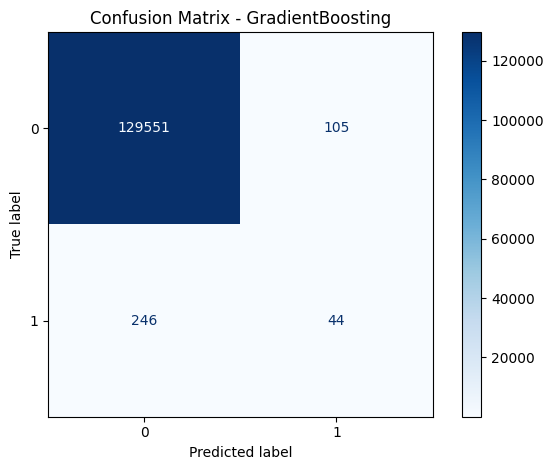

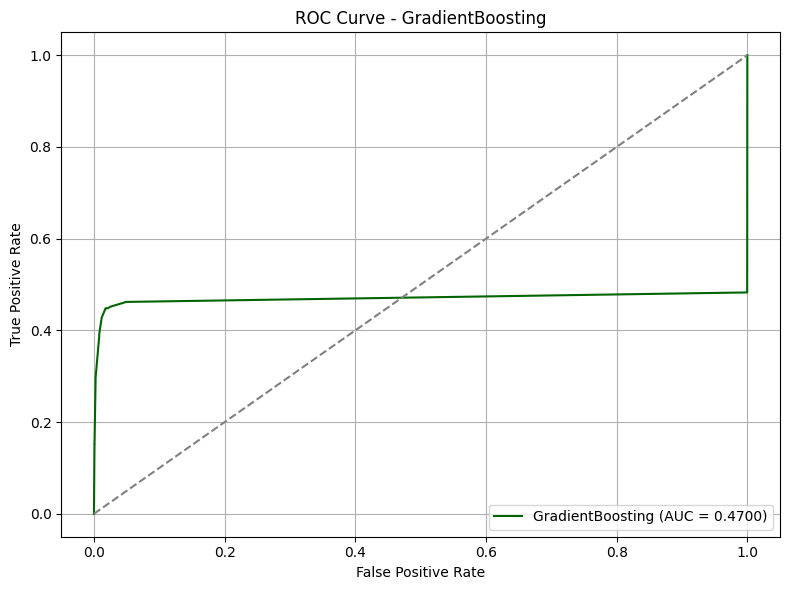

ROC AUC Score: 0.4700
AUPR Score: 0.0896

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/GradientBoostingClassifier.csv


In [52]:
# GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/GradientBoostingClassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Prepare features and labels
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training on {len(X_train)} samples with {X_train.shape[1]} features...")

# Model training
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - GradientBoosting")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"GradientBoosting (AUC = {roc_auc:.4f})", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GradientBoosting")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()
print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR Score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save predictions to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9991    0.9995    0.9993    129656
           1     0.7220    0.6000    0.6554       290

    accuracy                         0.9986    129946
   macro avg     0.8605    0.7997    0.8273    129946
weighted avg     0.9985    0.9986    0.9985    129946



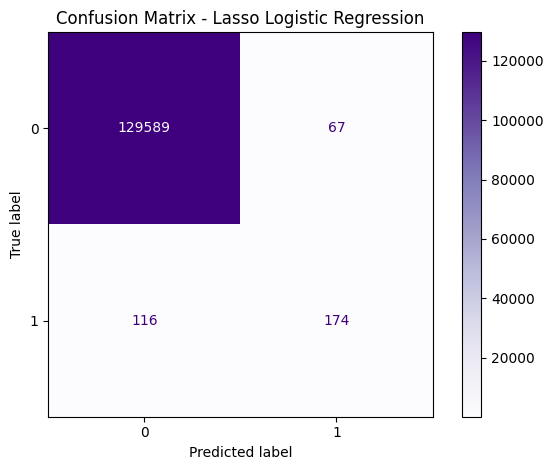

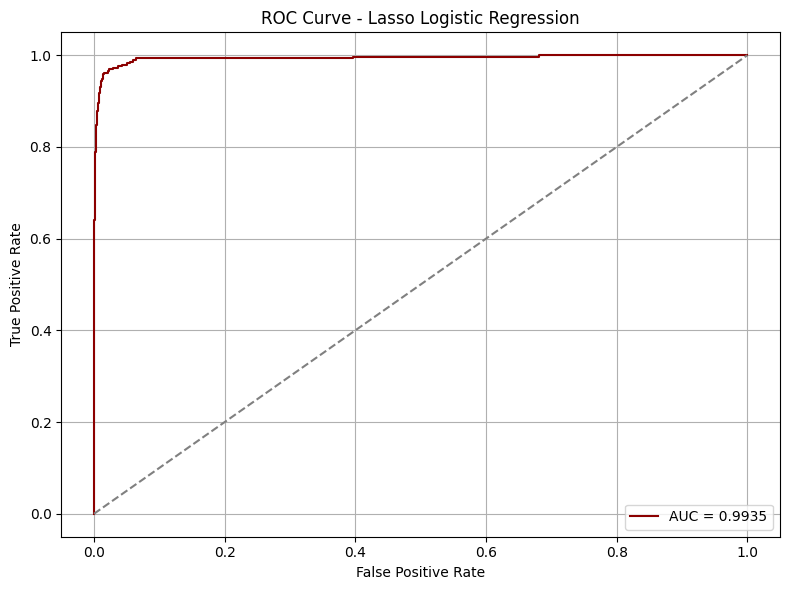

ROC AUC Score: 0.9935
AUPR Score: 0.6547

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/Lasso_LogisticRegression.csv


In [53]:
# Lasso Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/Lasso_LogisticRegression.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute gene interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge all datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")

# Drop rows with missing values
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Prepare features and labels
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso Logistic Regression
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Purples")
plt.title("Confusion Matrix - Lasso Logistic Regression")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Lasso Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()
print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save predictions to CSV
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

[LightGBM] [Info] Number of positive: 1157, number of negative: 518623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 519780, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9863    0.9930    129656
           1     0.1267    0.8862    0.2217       290

    accuracy                         0.9861    129946
   macro avg     0.5632    0.9363    0.6074    129946
weighted avg     0.9978    0.9861    0.9913    129946



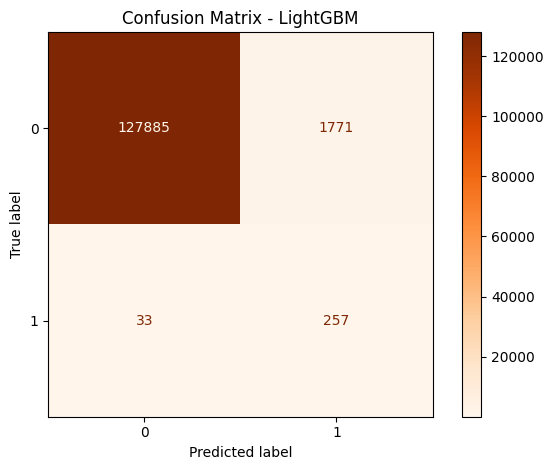

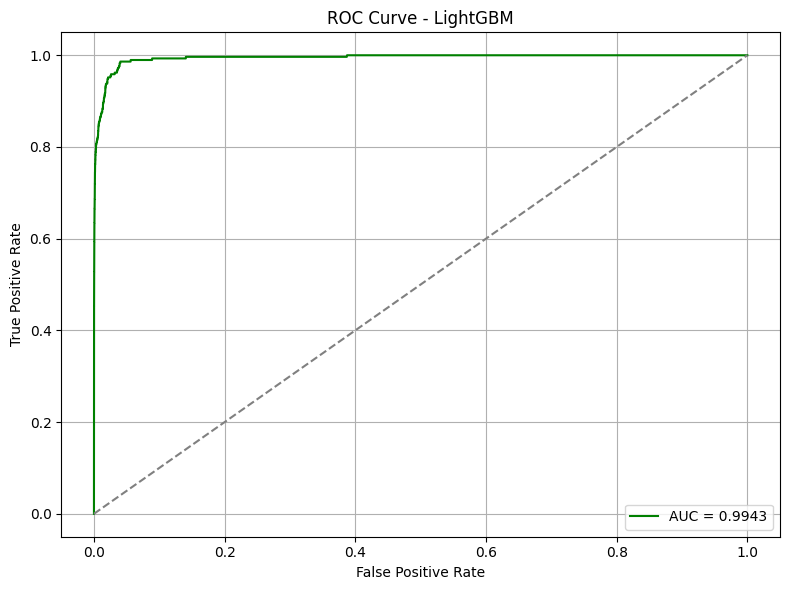

ROC AUC Score: 0.9943
AUPR Score: 0.6421

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/lightgbm_predictions.csv


In [54]:
# LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)
from lightgbm import LGBMClassifier

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/lightgbm_predictions.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Create interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Label encoding for categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Prepare features and labels
X = merged.drop(columns=['lable'])
y = merged['lable']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train LightGBM model
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Oranges")
plt.title("Confusion Matrix - LightGBM")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()
print(f"ROC AUC Score: {roc_auc:.4f}")

# AUPR Score
aupr_score = average_precision_score(y_test, y_proba)
print(f"AUPR Score: {aupr_score:.4f}")

# Save predictions
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr_score
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9994    0.9993    129656
           1     0.7056    0.6034    0.6506       290

    accuracy                         0.9986    129946
   macro avg     0.8524    0.8014    0.8249    129946
weighted avg     0.9985    0.9986    0.9985    129946



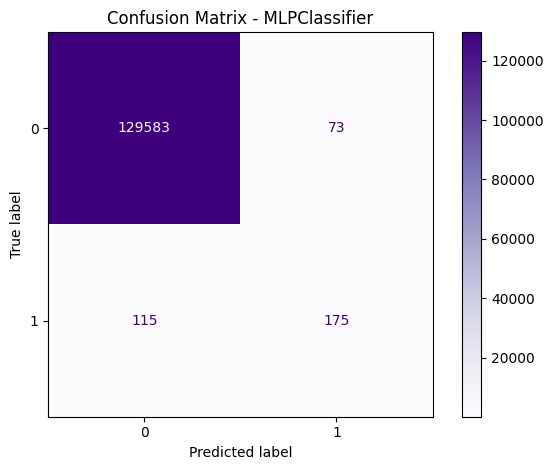

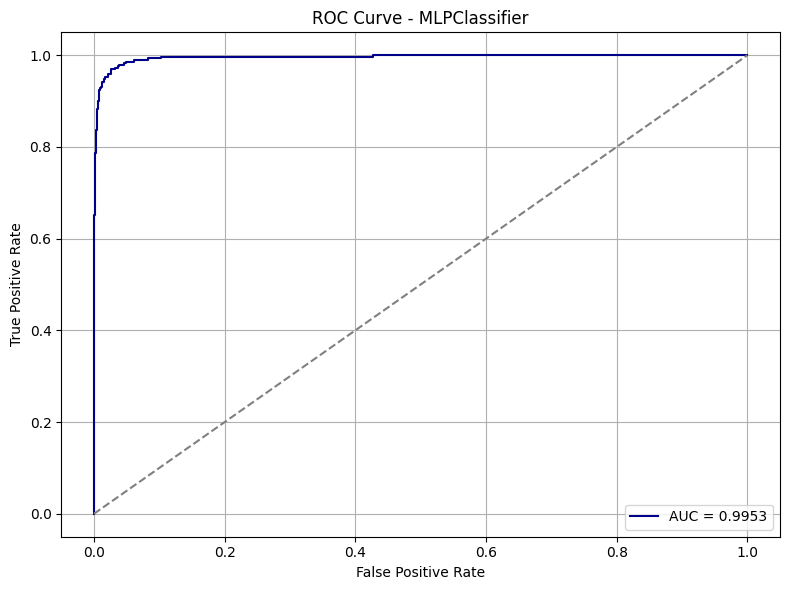

ROC AUC Score: 0.9953
AUPR Score: 0.6781

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/MLPClassifier.csv


In [55]:
# MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/MLPClassifier.csv'

# Load and merge datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and labels
X = merged.drop(columns=['lable'])
y = merged['lable']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Purples")
plt.title("Confusion Matrix - MLPClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLPClassifier")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9989    0.9991    129656
           1     0.5759    0.6931    0.6291       290

    accuracy                         0.9982    129946
   macro avg     0.7876    0.8460    0.8141    129946
weighted avg     0.9984    0.9982    0.9983    129946



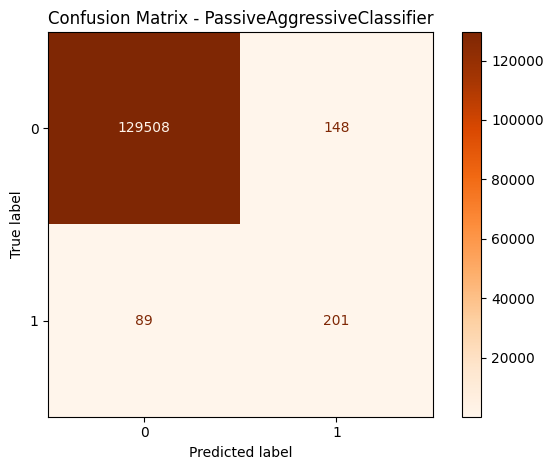

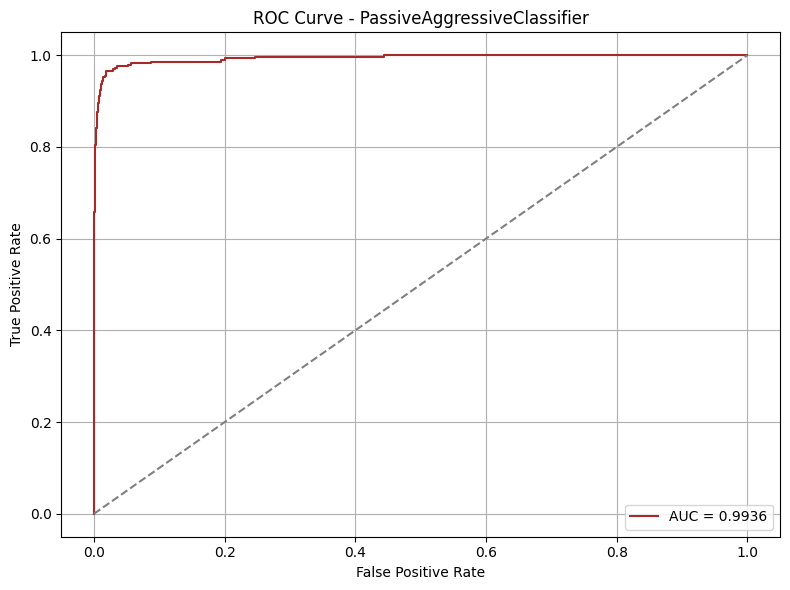

ROC AUC Score: 0.9936
AUPR Score: 0.6158

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/PassiveAggressiveClassifier.csv


In [56]:
# PassiveAggressiveClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/PassiveAggressiveClassifier.csv'

# Load and merge datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and labels
X = merged.drop(columns=['lable'])
y = merged['lable']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = PassiveAggressiveClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Probabilities: approximate using decision_function and sigmoid
from scipy.special import expit
y_score = model.decision_function(X_test_scaled)
y_proba = expit(y_score)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Oranges")
plt.title("Confusion Matrix - PassiveAggressiveClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='brown')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PassiveAggressiveClassifier")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9926    0.9962    129656
           1     0.2154    0.9138    0.3487       290

    accuracy                         0.9924    129946
   macro avg     0.6076    0.9532    0.6724    129946
weighted avg     0.9981    0.9924    0.9947    129946



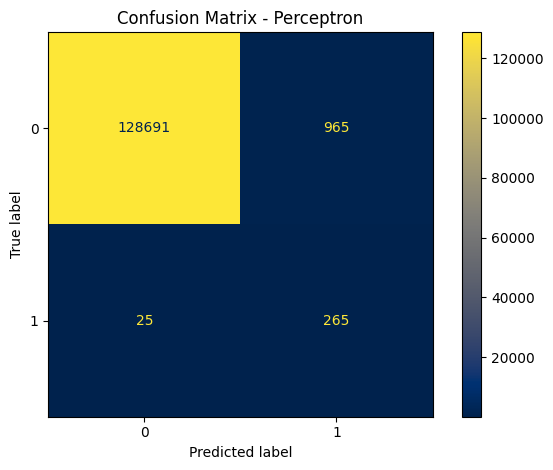

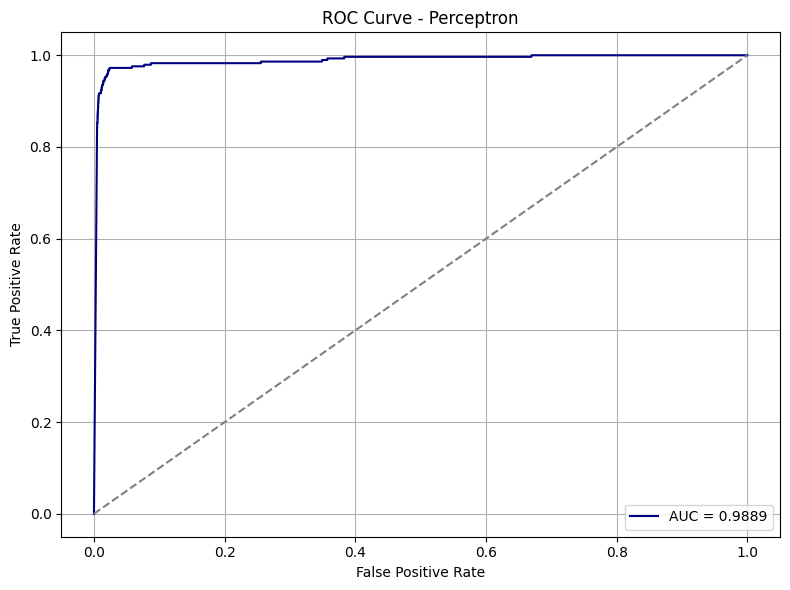

ROC AUC Score: 0.9889
AUPR Score: 0.2636

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/Perceptron.csv


In [57]:
# Perceptron with AUPR score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)
from scipy.special import expit

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/Perceptron.csv'

# Load and preprocess
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

le = LabelEncoder()
for col in merged.select_dtypes(include="object").columns:
    merged[col] = le.fit_transform(merged[col])

X = merged.drop(columns=["lable"])
y = merged["lable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Perceptron
model = Perceptron()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_score = model.decision_function(X_test_scaled)
y_proba = expit(y_score)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="cividis")
plt.title("Confusion Matrix - Perceptron")
plt.grid(False)
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Perceptron")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:
               precision    recall  f1-score   support

           0     0.9990    0.9997    0.9993    129656
           1     0.7921    0.5517    0.6504       290

    accuracy                         0.9987    129946
   macro avg     0.8955    0.7757    0.8249    129946
weighted avg     0.9985    0.9987    0.9986    129946



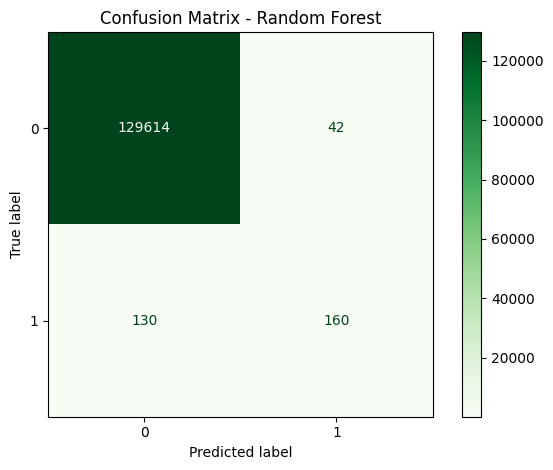

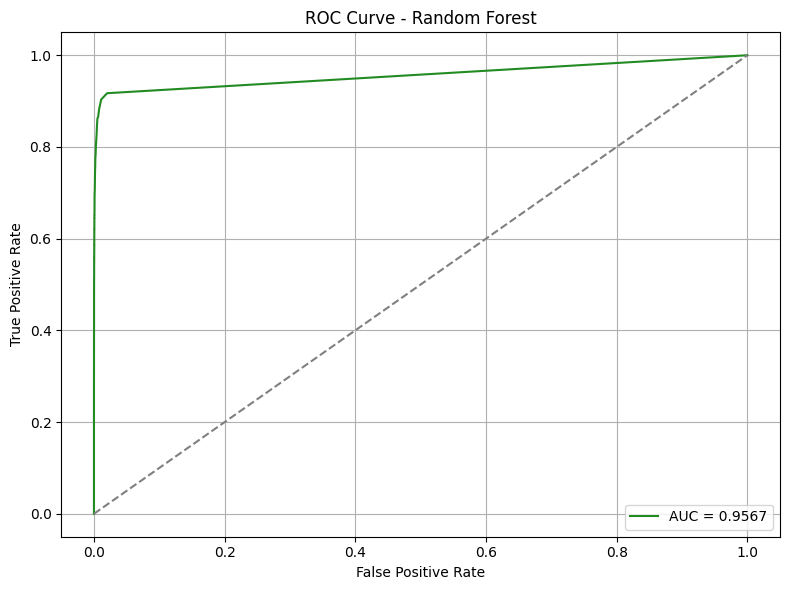

ROC AUC Score: 0.9567
AUPR Score: 0.6971

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/RandomForestClassifier.csv


In [58]:
# RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/RandomForestClassifier.csv'

# Load and preprocess
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

le = LabelEncoder()
for col in merged.select_dtypes(include="object").columns:
    merged[col] = le.fit_transform(merged[col])

X = merged.drop(columns=["lable"])
y = merged["lable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='forestgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9978    1.0000    0.9989    129656
           1     0.0000    0.0000    0.0000       290

    accuracy                         0.9978    129946
   macro avg     0.4989    0.5000    0.4994    129946
weighted avg     0.9955    0.9978    0.9967    129946



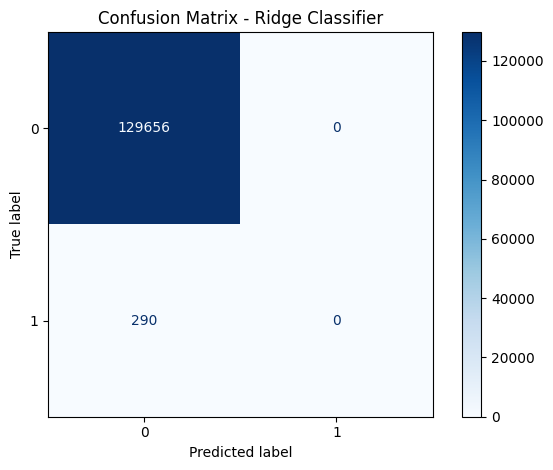

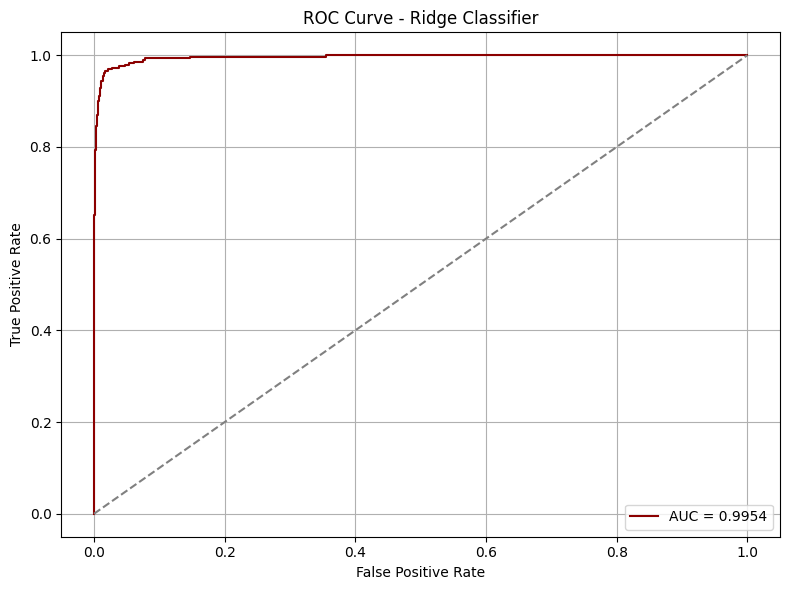

ROC AUC Score: 0.9954
AUPR Score: 0.6910

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/Ridge_Classifier.csv


In [59]:
# RidgeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/Ridge_Classifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Prepare interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge all datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include="object").columns:
    merged[col] = le.fit_transform(merged[col])

# Split features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RidgeClassifier
model = RidgeClassifier(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
decision_scores = model.decision_function(X_test)  # Used for ROC and AUPR

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Ridge Classifier")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, decision_scores)
roc_auc = roc_auc_score(y_test, decision_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkred", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ridge Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# AUPR score
aupr = average_precision_score(y_test, decision_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["decision_score"] = decision_scores
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9978    1.0000    0.9989    129656
           1     0.0000    0.0000    0.0000       290

    accuracy                         0.9978    129946
   macro avg     0.4989    0.5000    0.4994    129946
weighted avg     0.9955    0.9978    0.9966    129946



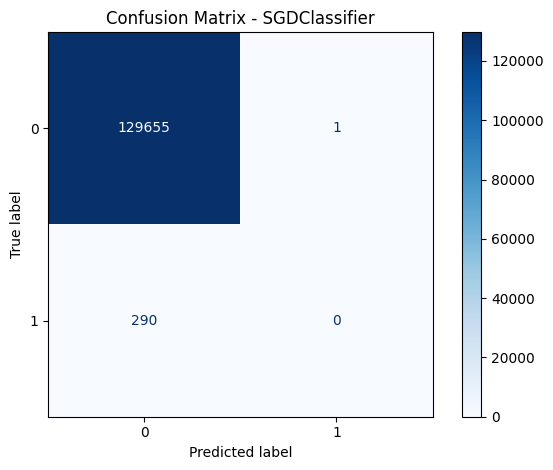

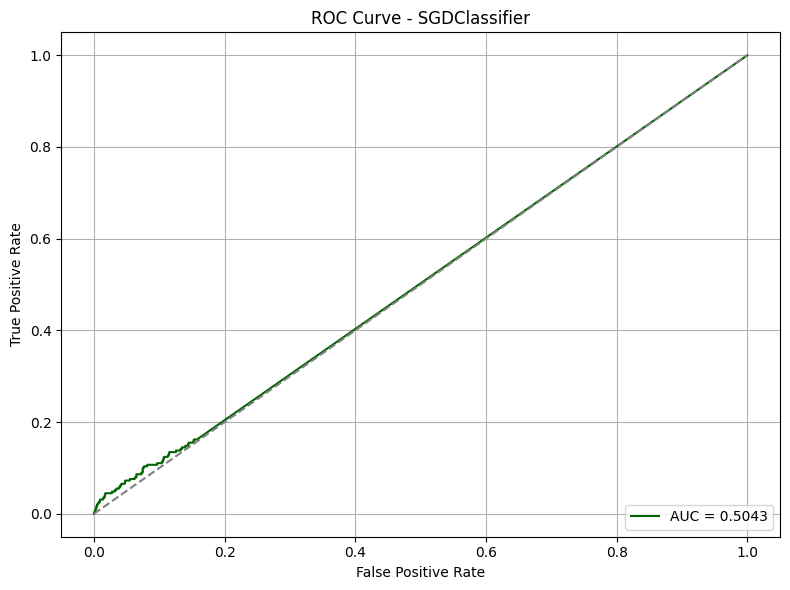

ROC AUC Score: 0.5043
AUPR Score: 0.0028

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/sgd_classifier.csv


In [60]:
# SGDClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/sgd_classifier.csv'

# Load and preprocess data
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute gene interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge all datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SGD Classifier with probability support
model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - SGDClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkgreen", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SGDClassifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# AUPR Score
aupr = average_precision_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["predicted_proba"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9986    0.9987    0.9987    129656
           1     0.3941    0.3655    0.3792       290

    accuracy                         0.9973    129946
   macro avg     0.6963    0.6821    0.6890    129946
weighted avg     0.9972    0.9973    0.9973    129946



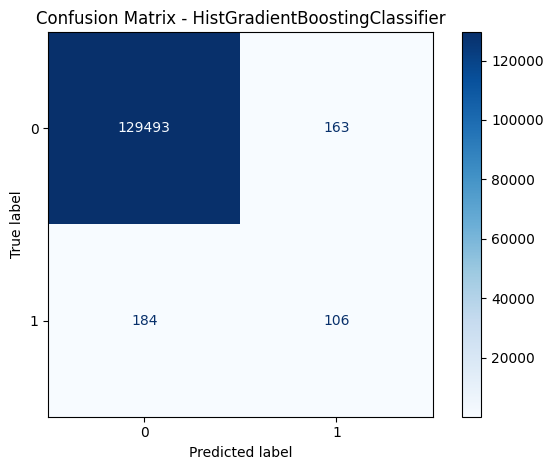

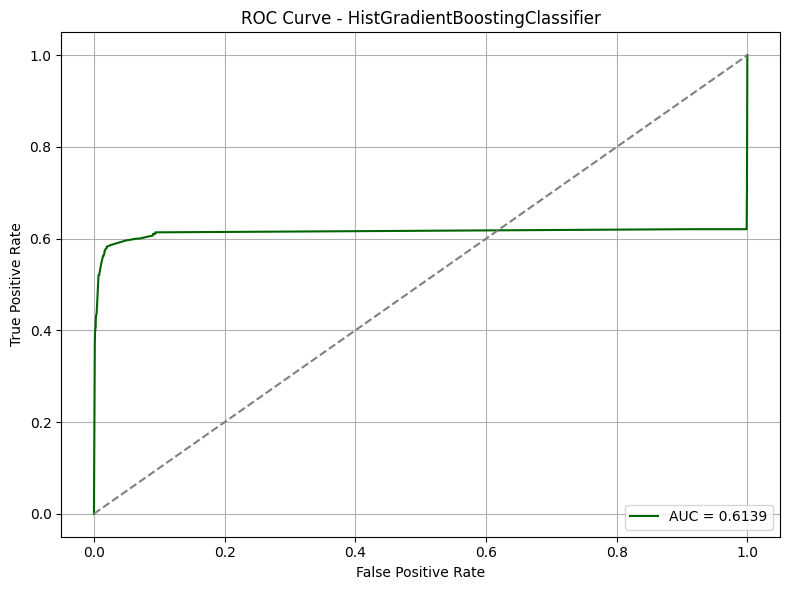

ROC AUC Score: 0.6139
AUPR Score: 0.1879

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/HistGradientBoostingClassifier.csv


In [61]:
# HistGradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/HistGradientBoostingClassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Create interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - HistGradientBoostingClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color="darkgreen")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - HistGradientBoostingClassifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# AUPR Score
aupr = average_precision_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save predictions
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["predicted_proba"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9978    1.0000    0.9989    129656
           1     0.0000    0.0000    0.0000       290

    accuracy                         0.9978    129946
   macro avg     0.4989    0.5000    0.4994    129946
weighted avg     0.9955    0.9978    0.9967    129946



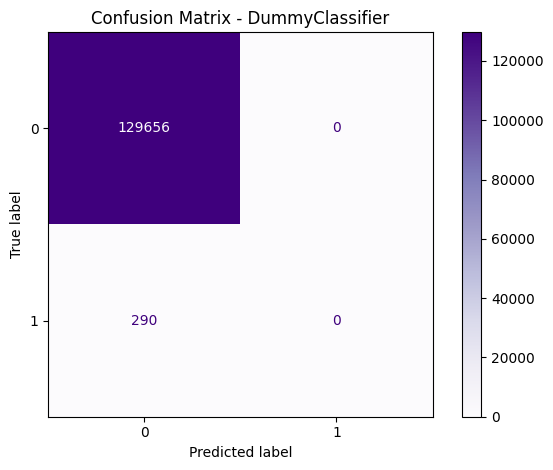

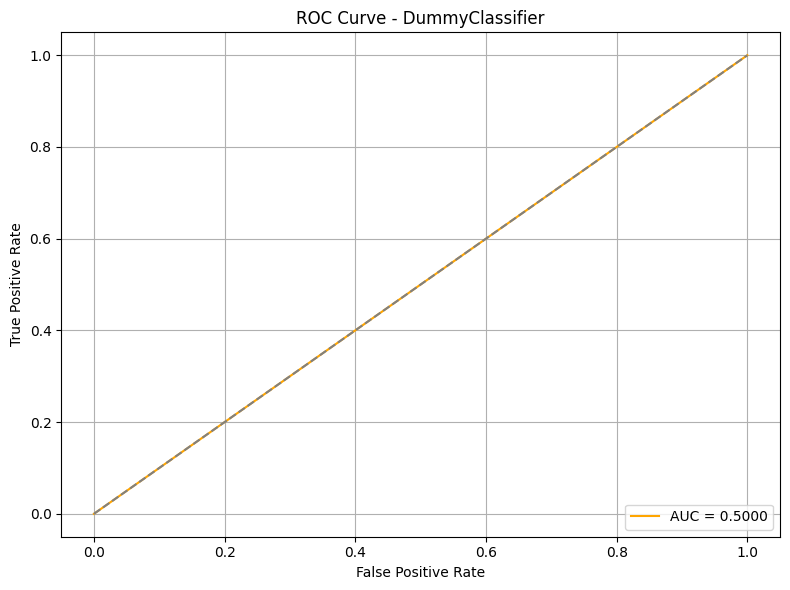

ROC AUC Score: 0.5000
AUPR Score: 0.0022

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/DummyClassifier.csv


In [62]:
# DummyClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/DummyClassifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Create interaction feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train dummy model
model = DummyClassifier(strategy="most_frequent", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Try to calculate predicted probabilities, ROC AUC and AUPR
try:
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    aupr = average_precision_score(y_test, y_proba)
except Exception:
    y_proba = [0.0] * len(y_test)
    roc_auc = 0.0
    aupr = 0.0

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Purples")
plt.title("Confusion Matrix - DummyClassifier")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve
try:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color="orange")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - DummyClassifier")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
except:
    print("ROC curve could not be plotted for this strategy.")

# Print scores
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save predictions
results = X_test.copy()
results["actual"] = y_test.values
results["predicted"] = y_pred
results["predicted_proba"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9979    0.9915    0.9947    129656
           1     0.0212    0.0828    0.0338       290

    accuracy                         0.9894    129946
   macro avg     0.5096    0.5371    0.5142    129946
weighted avg     0.9958    0.9894    0.9925    129946



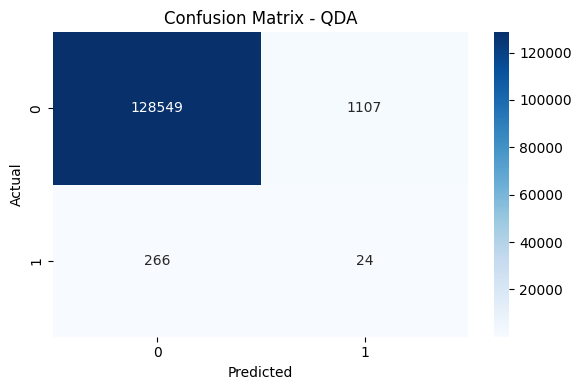

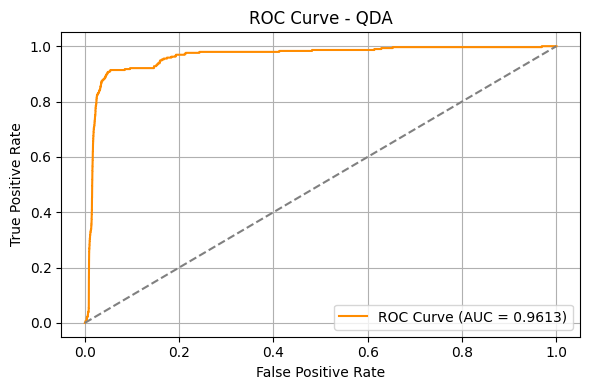

ROC AUC Score: 0.9613
AUPR Score: 0.0519

Complete results saved to: /Users/gunthaaishwarya/Desktop/datasets/QDAClassifier_results.csv


In [63]:
# QuadraticDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    average_precision_score
)
from sklearn.preprocessing import LabelEncoder

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/QDAClassifier_results.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and labels
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train QDA model
model = QuadraticDiscriminantAnalysis(reg_param=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - QDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - QDA')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print AUC and AUPR
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = X_test.copy()
results["actual"] = y_test.values
results["predicted"] = y_pred
results["predicted_proba"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nComplete results saved to: {output_path}")

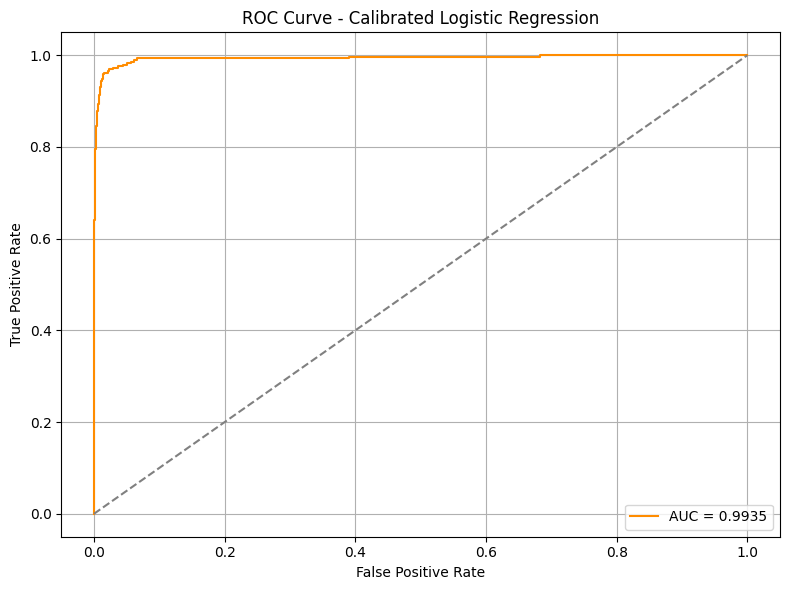

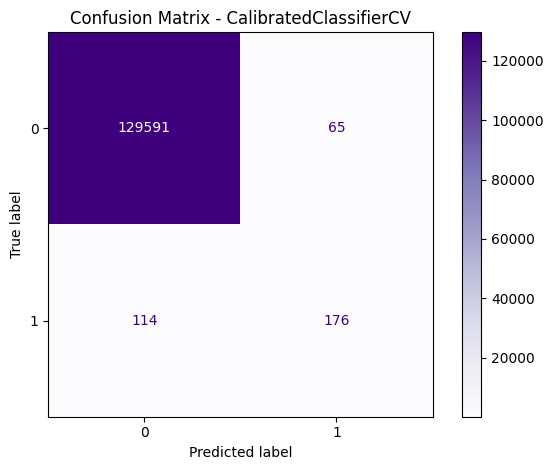

Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9995    0.9993    129656
           1     0.7303    0.6069    0.6629       290

    accuracy                         0.9986    129946
   macro avg     0.8647    0.8032    0.8311    129946
weighted avg     0.9985    0.9986    0.9986    129946

ROC AUC Score: 0.9935
AUPR Score: 0.6558

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/CalibratedClassifierCV.csv


In [64]:
#CalibratedClassifierCV with L R base estimator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/CalibratedClassifierCV.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable']) if 'lable' in merged.columns else merged.iloc[:, :-1]
y = merged['lable'] if 'lable' in merged.columns else merged.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calibrated Logistic Regression model
base_model = LogisticRegression(max_iter=1000)
model = CalibratedClassifierCV(estimator=base_model, method='sigmoid', cv=3)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Calibrated Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - CalibratedClassifierCV")
plt.tight_layout()
plt.show()

# Print Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save predictions and scores
results = X_test.copy()
results["actual"] = y_test.values
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

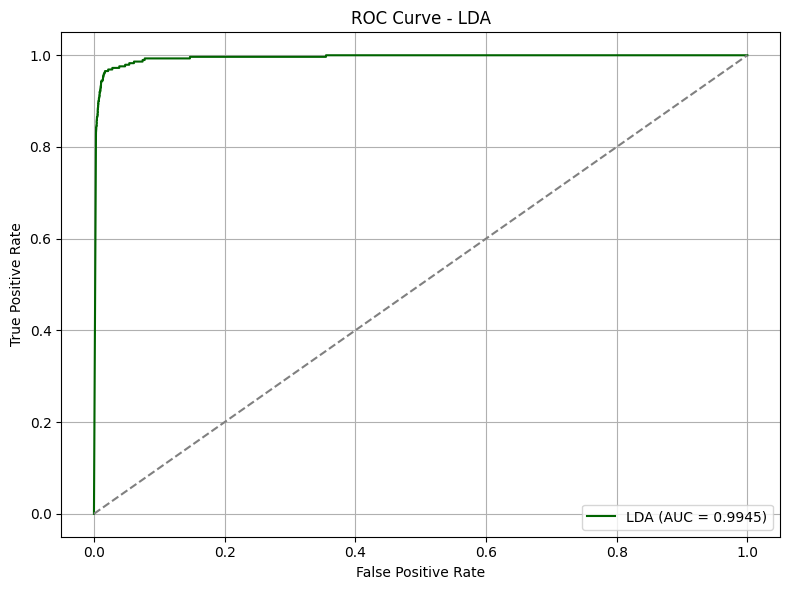

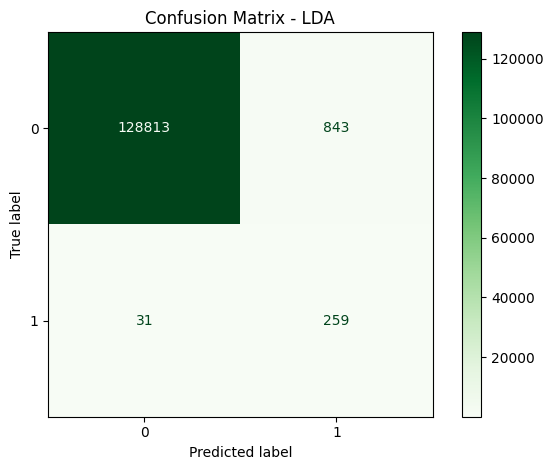

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9935    0.9966    129656
           1     0.2350    0.8931    0.3721       290

    accuracy                         0.9933    129946
   macro avg     0.6174    0.9433    0.6844    129946
weighted avg     0.9981    0.9933    0.9952    129946

ROC AUC Score: 0.9945
AUPR Score: 0.3417

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/LDA_predictions.csv


In [65]:
#LDA Classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/LDA_predictions.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Prepare interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=["lable"])
y = merged["lable"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LDA model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LDA (AUC = {roc_auc:.4f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LDA")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - LDA")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

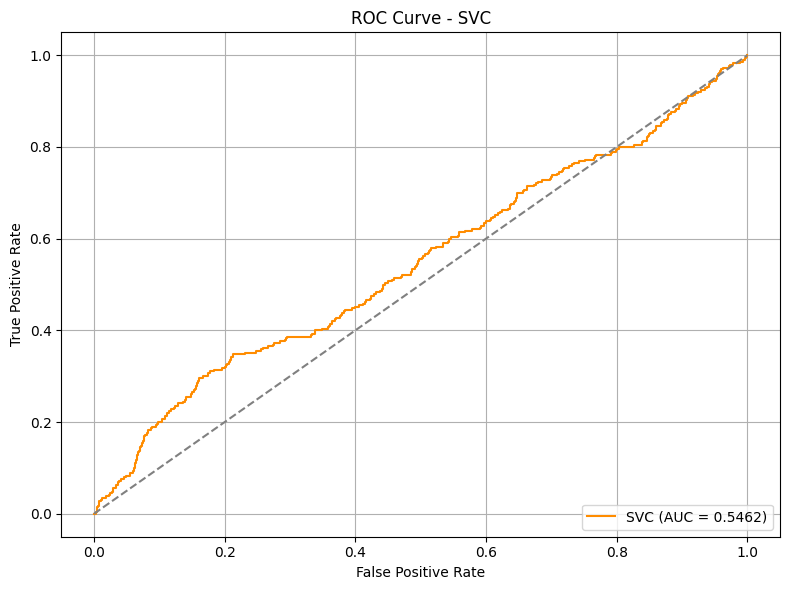

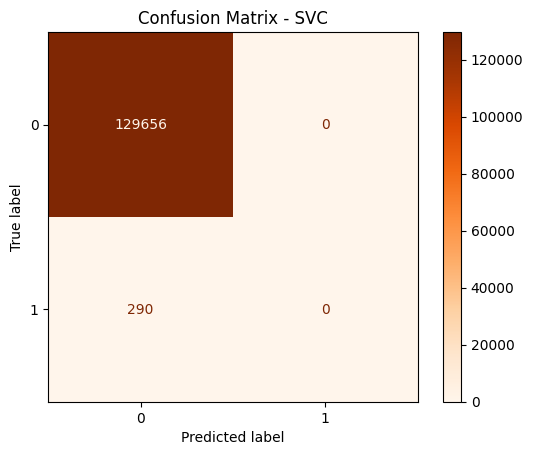

Classification Report:
               precision    recall  f1-score   support

           0     0.9978    1.0000    0.9989    129656
           1     0.0000    0.0000    0.0000       290

    accuracy                         0.9978    129946
   macro avg     0.4989    0.5000    0.4994    129946
weighted avg     0.9955    0.9978    0.9967    129946

ROC AUC Score: 0.5462
AUPR Score: 0.0031

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/SVC_classifier.csv


In [66]:
# SVC Classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/SVC_classifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Define features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVC model with probability=True
model = SVC(probability=True, kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVC (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVC")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - SVC")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save predictions
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

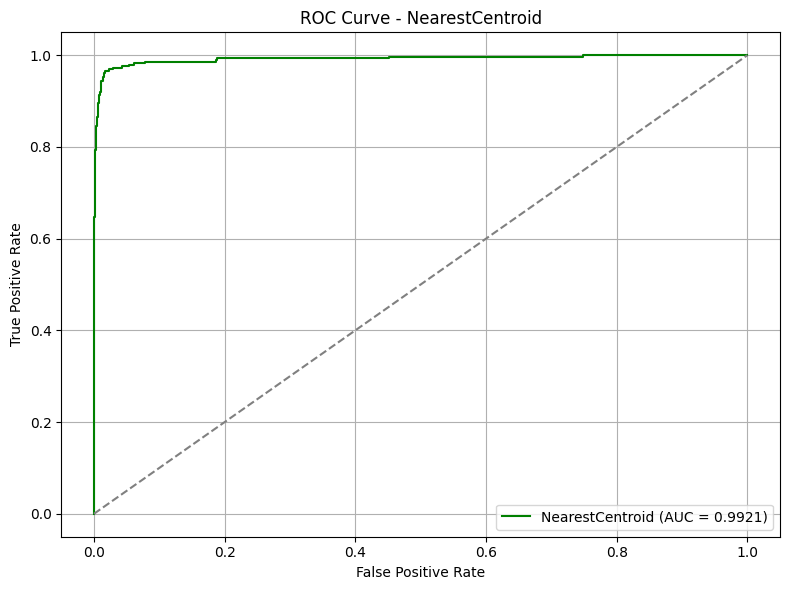

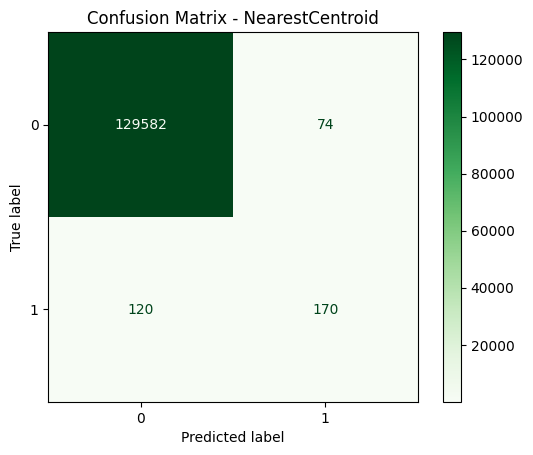

Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9994    0.9993    129656
           1     0.6967    0.5862    0.6367       290

    accuracy                         0.9985    129946
   macro avg     0.8479    0.7928    0.8180    129946
weighted avg     0.9984    0.9985    0.9984    129946

ROC AUC Score: 0.9921
AUPR Score: 0.6945

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/NearestCentroid.csv


In [67]:
# NearestCentroid Classifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    average_precision_score
)
from sklearn.neighbors import NearestCentroid
from sklearn.calibration import CalibratedClassifierCV

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/NearestCentroid.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NearestCentroid with calibration
base_model = NearestCentroid()
model = CalibratedClassifierCV(estimator=base_model, method='sigmoid', cv=3)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC and AUPR scores
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'NearestCentroid (AUC = {roc_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - NearestCentroid")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - NearestCentroid")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save predictions and metrics
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

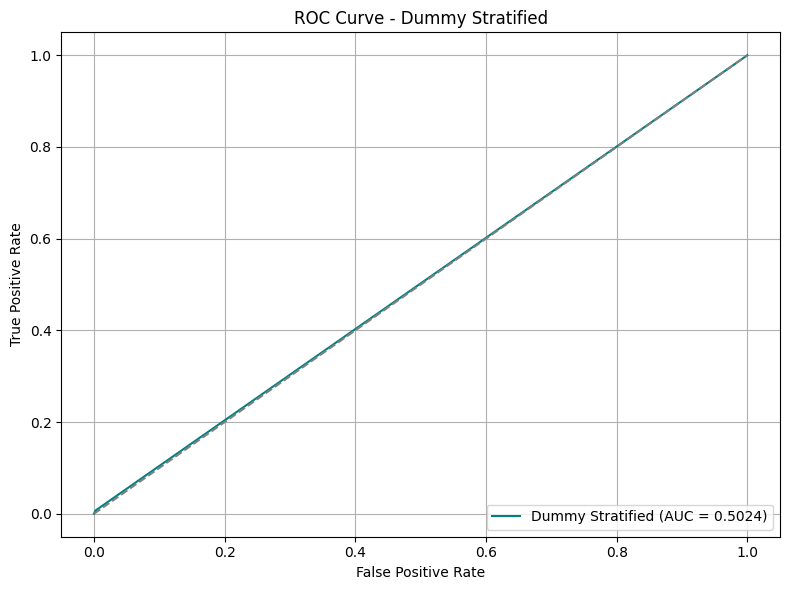

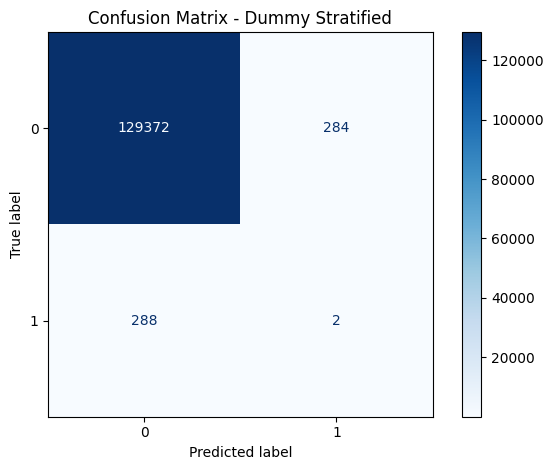

Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9978    0.9978    129656
           1     0.0070    0.0069    0.0069       290

    accuracy                         0.9956    129946
   macro avg     0.5024    0.5024    0.5024    129946
weighted avg     0.9956    0.9956    0.9956    129946

ROC AUC Score: 0.5024
AUPR Score: 0.0023

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/DummyStratified.csv


In [68]:
# DummyStratified
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/DummyStratified.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Prepare interaction degree feature
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=["lable"])
y = merged["lable"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train DummyClassifier with stratified strategy
model = DummyClassifier(strategy="stratified", random_state=42)
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Dummy Stratified (AUC = {roc_auc:.4f})', color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Dummy Stratified")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Dummy Stratified")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = X_test.copy()
results["actual"] = y_test
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

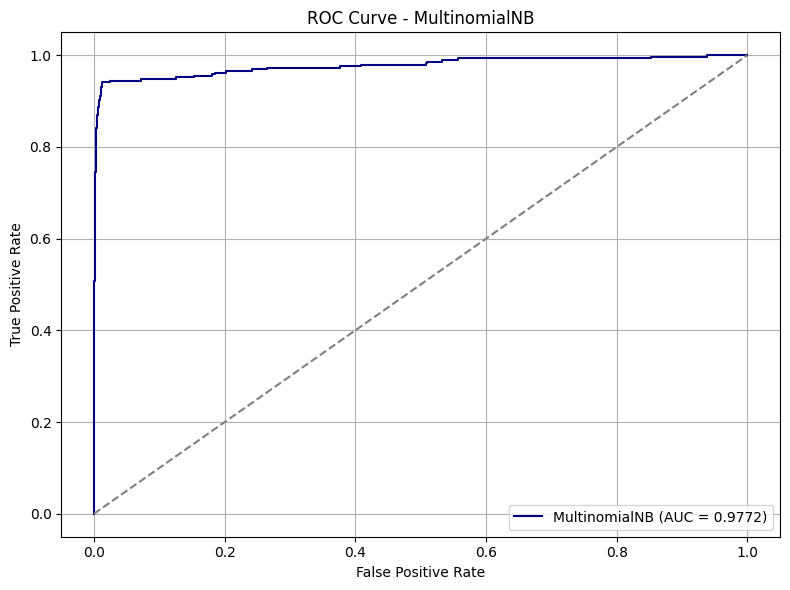

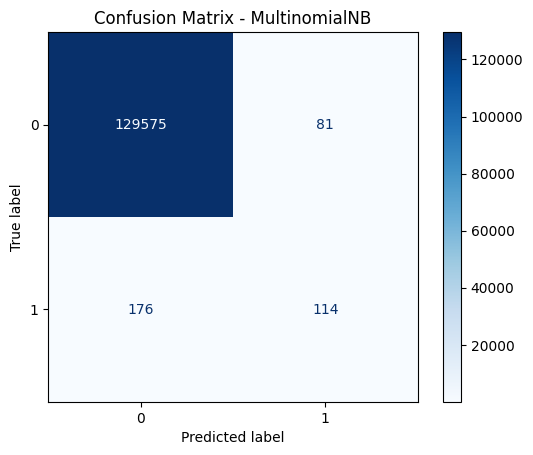

Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9994    0.9990    129656
           1     0.5846    0.3931    0.4701       290

    accuracy                         0.9980    129946
   macro avg     0.7916    0.6962    0.7346    129946
weighted avg     0.9977    0.9980    0.9978    129946

ROC AUC Score: 0.9772
AUPR Score: 0.4926

Predictions and metrics saved to: /Users/gunthaaishwarya/Desktop/datasets/MultinomialNB_classifier.csv


In [69]:
# MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import (
    classification_report,
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/MultinomialNB_classifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute interaction degree for each gene
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Define features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Ensure features are non-negative for MultinomialNB
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes with calibration
base_model = MultinomialNB()
model = CalibratedClassifierCV(estimator=base_model, method='sigmoid', cv=3)
model.fit(X_train, y_train)

# Predict and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC and AUPR scores
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'MultinomialNB (AUC = {roc_auc:.4f})', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MultinomialNB")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - MultinomialNB")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save predictions
results = pd.DataFrame(X_test, columns=X.columns)
results["actual"] = y_test.values
results["predicted"] = y_pred
results["probability"] = y_proba
results["roc_auc_score"] = roc_auc
results["aupr_score"] = aupr
results.to_csv(output_path, index=False)
print(f"\nPredictions and metrics saved to: {output_path}")

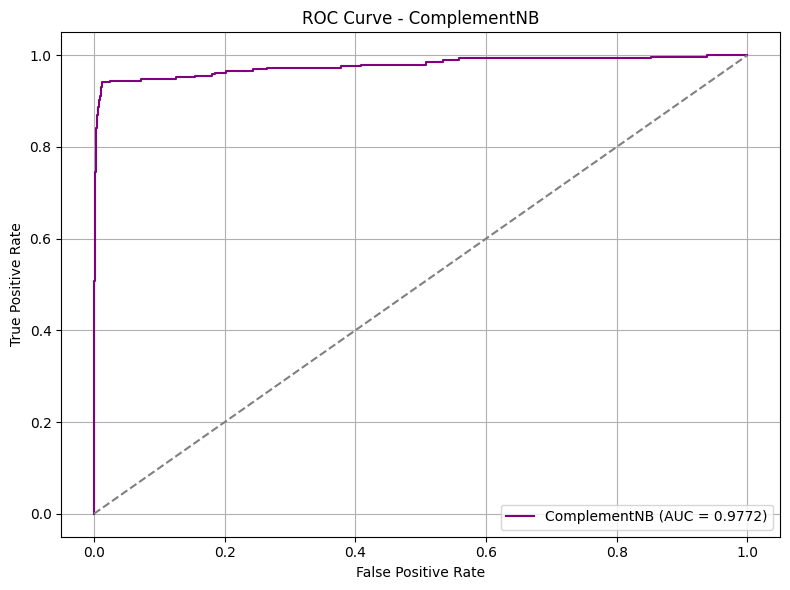

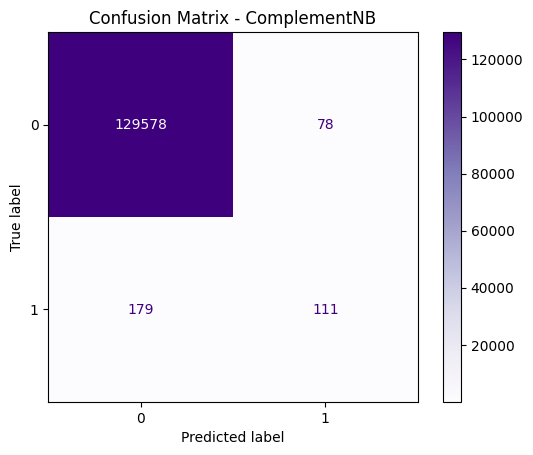

Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9994    0.9990    129656
           1     0.5873    0.3828    0.4635       290

    accuracy                         0.9980    129946
   macro avg     0.7930    0.6911    0.7312    129946
weighted avg     0.9977    0.9980    0.9978    129946

ROC AUC Score: 0.9772
AUPR Score: 0.4927

Results saved to: /Users/gunthaaishwarya/Desktop/datasets/ComplementNB_classifier.csv


In [70]:
# ComplementNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import (
    classification_report,
    roc_curve,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.naive_bayes import ComplementNB
from sklearn.calibration import CalibratedClassifierCV

# File paths
gene_disease_path = '/Users/gunthaaishwarya/Desktop/datasets/filtered_gene_disease_associations.csv'
gene_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/gene-ids(gene-ids).csv'
interactomes_path = '/Users/gunthaaishwarya/Desktop/datasets/D1-interactomes(in).csv'
disease_ids_path = '/Users/gunthaaishwarya/Desktop/datasets/diseases_id(diseases_id).csv'
output_path = '/Users/gunthaaishwarya/Desktop/datasets/ComplementNB_classifier.csv'

# Load datasets
gene_disease = pd.read_csv(gene_disease_path)
gene_ids = pd.read_csv(gene_ids_path)
interactomes = pd.read_csv(interactomes_path)
disease_ids = pd.read_csv(disease_ids_path)

# Compute interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged = merged.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in merged.select_dtypes(include=['object']).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Scale to non-negative range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ComplementNB with calibration
base_model = ComplementNB()
model = CalibratedClassifierCV(estimator=base_model, method='sigmoid', cv=3)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC and AUPR scores
roc_auc = roc_auc_score(y_test, y_proba)
aupr = average_precision_score(y_test, y_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ComplementNB (AUC = {roc_auc:.4f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ComplementNB")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - ComplementNB")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"AUPR Score: {aupr:.4f}")

# Save results
results = pd.DataFrame(X_test, columns=X.columns)
results['actual'] = y_test.values
results['predicted'] = y_pred
results['probability'] = y_proba
results['roc_auc_score'] = roc_auc
results['aupr_score'] = aupr
results.to_csv(output_path, index=False)
print(f"\nResults saved to: {output_path}")


Training LogisticRegression...

Training KNeighborsClassifier...

Training StackingClassifier...

Training CatBoostClassifier...

Training XGBClassifier...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:06:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training AdaBoostClassifier...

Training BaggingClassifier...

Training BernoulliNB...

Training DecisionTreeClassifier...

Training ExtraTreesClassifier...

Training GaussianNB...

Training GradientBoostingClassifier...

Training Lasso_LogisticRegression...

Training LightGBM...
[LightGBM] [Info] Number of positive: 1157, number of negative: 518623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 519780, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002226 -> initscore=-6.105347
[LightGBM] [Info] Start training from score -6.105347

Training MLPClassifier...

Training PassiveAggressiveClassifier...

Training Perceptron...

Training RandomForestClassifier...

Training RidgeClassifier...

Tr

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio


Training SVC...

Training LDA...

Training NearestCentroid...

Training DummyStratified...

Training ComplementNB...
Error training ComplementNB: Negative values in data passed to ComplementNB (input X).


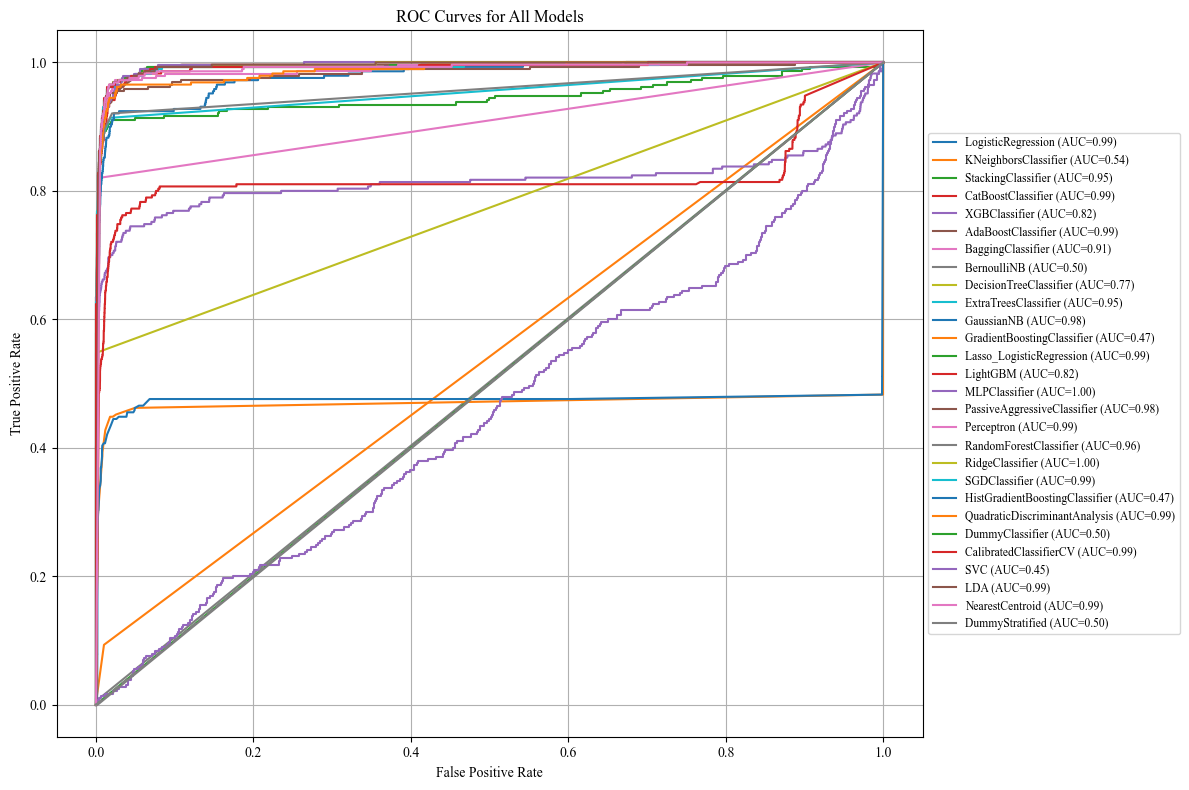

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_fscore_support
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import (
    StackingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

# Load datasets
gene_disease = pd.read_csv("filtered_gene_disease_associations.csv")
gene_ids = pd.read_csv("gene-ids(gene-ids).csv")
interactomes = pd.read_csv("D1-interactomes(in).csv")
disease_ids = pd.read_csv("diseases_id(diseases_id).csv")

# Interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and Target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model dictionary
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'StackingClassifier': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('dt', DecisionTreeClassifier()),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'XGBClassifier': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BernoulliNB': BernoulliNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GaussianNB': GaussianNB(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Lasso_LogisticRegression': LogisticRegression(penalty='l1', solver='liblinear'),
    'LightGBM': lgb.LGBMClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=300),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(max_iter=1000),
    'Perceptron': Perceptron(),
    'RandomForestClassifier': RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'SGDClassifier': SGDClassifier(loss='log_loss'),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'MultinomialNB': MultinomialNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'DummyClassifier': DummyClassifier(strategy="most_frequent"),
    'CalibratedClassifierCV': CalibratedClassifierCV(estimator=LogisticRegression(), method='sigmoid', cv=3),
    'SVC': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'NearestCentroid': NearestCentroid(),
    'DummyStratified': DummyClassifier(strategy="stratified"),
    'ComplementNB': ComplementNB()
}

# Initialize storage for ROC metrics
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    use_scaled = name in ['MLPClassifier', 'Perceptron', 'SGDClassifier', 'PassiveAggressiveClassifier']
    Xtr = X_train_scaled if use_scaled else X_train
    Xts = X_test_scaled if use_scaled else X_test

    try:
        model.fit(Xtr, y_train)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(Xts)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(Xts)
        else:
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        fpr_dict[name] = fpr
        tpr_dict[name] = tpr
        roc_auc_dict[name] = auc

    except Exception as e:
        print(f"Error training {name}: {e}")

# Set global font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for name in fpr_dict:
    plt.plot(fpr_dict[name], tpr_dict[name], label=f'{name} (AUC={roc_auc_dict[name]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curves_all_models.png", dpi=1200, bbox_inches='tight')
plt.show()


Error scoring MultinomialNB: 'MultinomialNB' object has no attribute 'feature_log_prob_'
Error scoring ComplementNB: 'ComplementNB' object has no attribute 'feature_log_prob_'


/var/folders/cs/83ssy9556m15lz236q8_phtm0000gn/T/ipykernel_1053/1739604492.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=precision_df, palette='viridis')


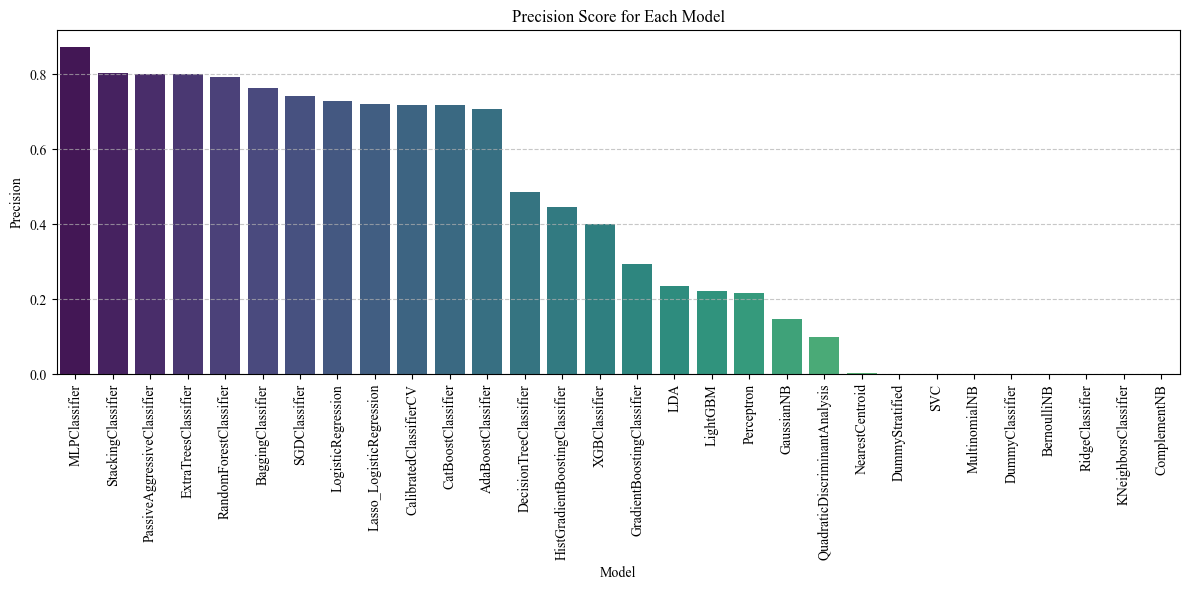

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# Initialize lists to collect metrics
model_names = []
precision_scores = []

# Calculate Precision for each model
for name, model in models.items():
    use_scaled = name in ['MLPClassifier', 'Perceptron', 'SGDClassifier', 'PassiveAggressiveClassifier']
    Xts = X_test_scaled if use_scaled else X_test

    try:
        y_pred = model.predict(Xts)
        precision, _, _, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', zero_division=0
        )
        model_names.append(name)
        precision_scores.append(precision)
    except Exception as e:
        print(f"Error scoring {name}: {e}")
        model_names.append(name)
        precision_scores.append(0)

# Create DataFrame for plotting
precision_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores
}).sort_values(by='Precision', ascending=False)

# Plot Precision Bar Graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Precision', data=precision_df, palette='viridis')
plt.title('Precision Score for Each Model')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save high-resolution image
plt.savefig("precision_barplotnew.png", dpi=1200, bbox_inches='tight')
plt.show()

Error evaluating MultinomialNB: 'MultinomialNB' object has no attribute 'feature_log_prob_'
Error evaluating ComplementNB: 'ComplementNB' object has no attribute 'feature_log_prob_'


/var/folders/cs/83ssy9556m15lz236q8_phtm0000gn/T/ipykernel_1053/3817310631.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=recall_df, palette='coolwarm')


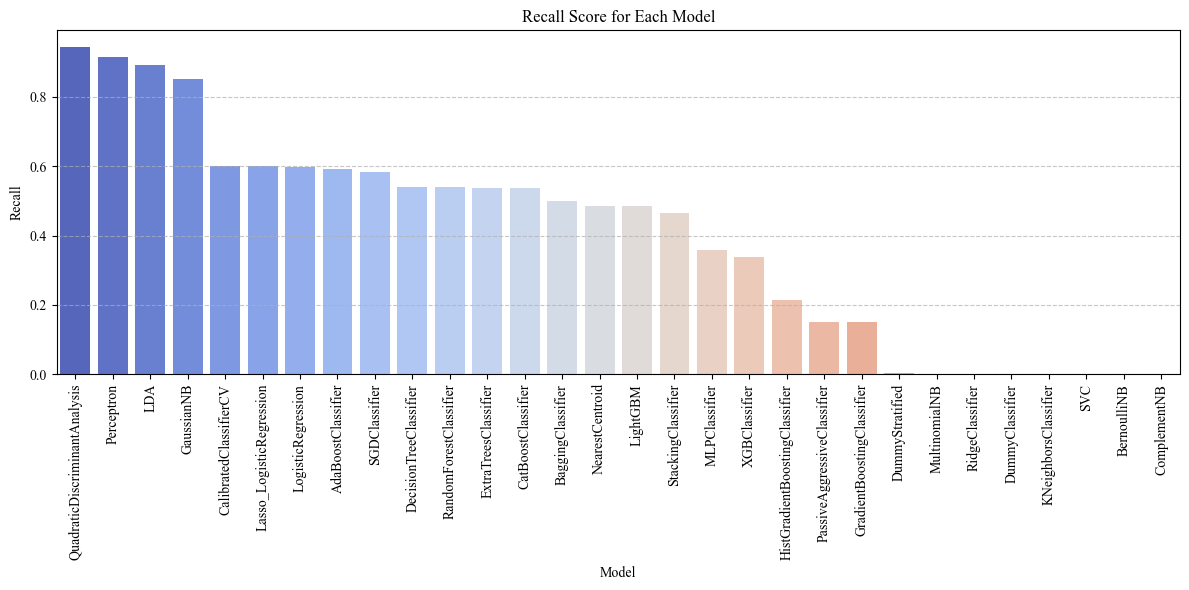

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Set font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# Initialize empty list
recall_data = []

# Evaluate recall for each model
for name, model in models.items():
    use_scaled = name in ['MLPClassifier', 'Perceptron', 'SGDClassifier', 'PassiveAggressiveClassifier']
    Xts = X_test_scaled if use_scaled else X_test

    try:
        y_pred = model.predict(Xts)
        _, recall, _, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', zero_division=0
        )
        recall_data.append({'Model': name, 'Recall': recall})
    except Exception as e:
        print(f"Error evaluating {name}: {e}")
        recall_data.append({'Model': name, 'Recall': 0})

# Create DataFrame for plotting
recall_df = pd.DataFrame(recall_data).sort_values(by='Recall', ascending=False)

# Plot Recall Bar Graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Recall', data=recall_df, palette='coolwarm')
plt.title('Recall Score for Each Model')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save high-resolution image
plt.savefig("recall_barplot.png", dpi=1200, bbox_inches='tight')
plt.show()


Training LogisticRegression...
Training KNeighborsClassifier...
Training StackingClassifier...
Training CatBoostClassifier...
Training XGBClassifier...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:31:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training AdaBoostClassifier...
Training BaggingClassifier...
Training BernoulliNB...
Training DecisionTreeClassifier...
Training ExtraTreesClassifier...
Training GaussianNB...
Training GradientBoostingClassifier...
Training Lasso_LogisticRegression...
Training LightGBM...
[LightGBM] [Info] Number of positive: 1157, number of negative: 518623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 519780, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002226 -> initscore=-6.105347
[LightGBM] [Info] Start training from score -6.105347
Training MLPClassifier...
Training PassiveAggressiveClassifier...
Training Perceptron...
Training RandomForestClassifier...
Training RidgeClassifier...
Training SGDClass

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio

Training SVC...
Training LDA...
Training NearestCentroid...
Training DummyStratified...
Training ComplementNB...
Error training ComplementNB: Negative values in data passed to ComplementNB (input X).
Error evaluating MultinomialNB: 'MultinomialNB' object has no attribute 'feature_log_prob_'
Error evaluating ComplementNB: 'ComplementNB' object has no attribute 'feature_log_prob_'


/var/folders/cs/83ssy9556m15lz236q8_phtm0000gn/T/ipykernel_1053/1445875292.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1_Score', data=f1_df, palette='viridis')


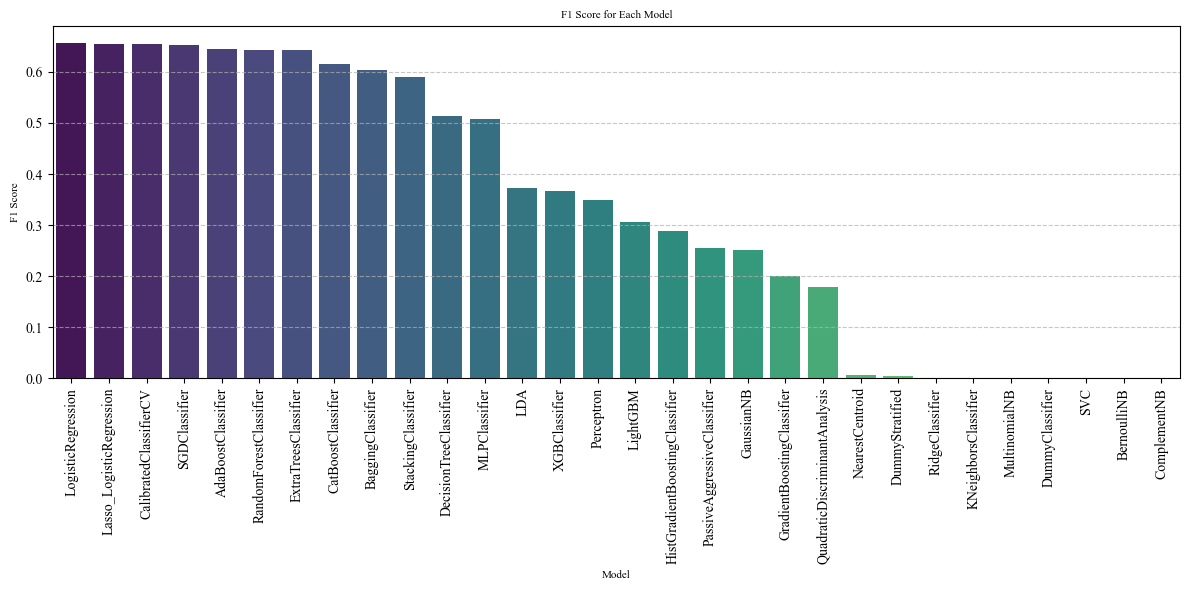

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import (
    StackingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
)
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

# Set font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# Load datasets
gene_disease = pd.read_csv("filtered_gene_disease_associations.csv")
gene_ids = pd.read_csv("gene-ids(gene-ids).csv")
interactomes = pd.read_csv("D1-interactomes(in).csv")
disease_ids = pd.read_csv("diseases_id(diseases_id).csv")

# Interaction degree
gene_degree_1 = interactomes["gene_ID1"].value_counts()
gene_degree_2 = interactomes["gene_ID2"].value_counts()
gene_degrees = gene_degree_1.add(gene_degree_2, fill_value=0).reset_index()
gene_degrees.columns = ['gene_ID', 'interaction_degree']

# Merge datasets
merged = gene_disease.merge(gene_ids, on="gene_ID", how="left")
merged = merged.merge(disease_ids, left_on="disease_ID", right_on="diseases_ID", how="left")
merged = merged.merge(gene_degrees, on="gene_ID", how="left")
merged.dropna(inplace=True)

# Encode categorical
le = LabelEncoder()
for col in merged.select_dtypes(include=["object"]).columns:
    merged[col] = le.fit_transform(merged[col])

# Features and Target
X = merged.drop(columns=['lable'])
y = merged['lable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'StackingClassifier': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('dt', DecisionTreeClassifier()),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'XGBClassifier': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BernoulliNB': BernoulliNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GaussianNB': GaussianNB(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Lasso_LogisticRegression': LogisticRegression(penalty='l1', solver='liblinear'),
    'LightGBM': lgb.LGBMClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=300),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(max_iter=1000),
    'Perceptron': Perceptron(),
    'RandomForestClassifier': RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'SGDClassifier': SGDClassifier(loss='log_loss'),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'MultinomialNB': MultinomialNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'DummyClassifier': DummyClassifier(strategy="most_frequent"),
    'CalibratedClassifierCV': CalibratedClassifierCV(estimator=LogisticRegression(), method='sigmoid', cv=3),
    'SVC': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'NearestCentroid': NearestCentroid(),
    'DummyStratified': DummyClassifier(strategy="stratified"),
    'ComplementNB': ComplementNB()
}

# Train all models
for name, model in models.items():
    print(f"Training {name}...")
    use_scaled = name in ['MLPClassifier', 'Perceptron', 'SGDClassifier', 'PassiveAggressiveClassifier']
    Xtr = X_train_scaled if use_scaled else X_train
    try:
        model.fit(Xtr, y_train)
    except Exception as e:
        print(f"Error training {name}: {e}")

# F1 Score Calculation
f1_data = []

for name, model in models.items():
    use_scaled = name in ['MLPClassifier', 'Perceptron', 'SGDClassifier', 'PassiveAggressiveClassifier']
    Xts = X_test_scaled if use_scaled else X_test

    try:
        y_pred = model.predict(Xts)
        _, _, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', zero_division=0
        )
        f1_data.append({'Model': name, 'F1_Score': f1})
    except Exception as e:
        print(f"Error evaluating {name}: {e}")
        f1_data.append({'Model': name, 'F1_Score': 0})

# Create DataFrame and Plot
f1_df = pd.DataFrame(f1_data).sort_values(by='F1_Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1_Score', data=f1_df, palette='viridis')
plt.title('F1 Score for Each Model', fontsize=8)
plt.xlabel('Model', fontsize=8)
plt.ylabel('F1 Score', fontsize=8)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("f1_score_barplot.png", dpi=1200, bbox_inches='tight')
plt.show()
